# **Project Name** : **Online Retail Customer Segmentation**
## **Project Type - Unsupervised**

## **Contribution - Data_Marcos**

##### **Team Member 1 -** **Ritik Gour**
##### **Team Member 2 -** **Manish Kumar Prasad**
##### **Team Member 3 -** **Niteesh Kumar**
##### **Team Member 4 -** **Ashish Kumar**

# **GitHub**

**Link :** https://github.com/ritikgour/UNSupervised_ML_Online_Retail_Customer_Segmentation.git

# **Project Summary**

### **The purpose of this machine learning is customer segmentation for online retail business. Customer segmentation involves dividing customers into different groups based on common characteristics, behaviors or preferences. By effectively segmenting customers, businesses can gain better insights and create marketing strategies for specific customers, thereby increasing customer satisfaction and value.**

### **Dataset**:--- This project uses a dataset that contains information about online vendors. The data includes attributes such as customers, purchase history, purchase frequency, purchase cost, and other variables that help to segment customers effectively.

### **Purpose**:--- The main purpose of this project is to use machine learning techniques to categorize online sellers into useful groups based on their purchasing behavior and characteristics. This segmentation will help businesses better understand their customers, identify patterns and trends, and create personalized marketing plans for each segment.

# **Problem Statement**


### In this project your task is to identify main customers from different data from different countries which includes all businesses that occurred in the UK between 12 January 2010 and 12 September 2011. The company usually always sells special gifts. Most of the company's customers are wholesalers..

## **Data Description**

### **Attribute Information:--**

* ### **InvoinceNO**:Invoice number. Nominal, a 6-digit intergal number uniquely assigned to each transaction. If this code starts with letter 'c',it indicates a cancellation.



* ### **StockCode** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.


* ### **Description** Product (item) name. Nominal

* ### **Quantity** The quantities of each product (item) per transaction. Numeric.


* ### **InvoinceDate** Invoice Date and Time . Numeric, the day and time when each transaction was generated.


* ### **UnitPrice** Unit Price.Numeric, product price per unit in sterling.


* ### **CustomerID**  Customer Number. Nominal, a 5-digit integral number uniquely assigned to each customer.


* ### **Country** COuntry Name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [1]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

# #set style
# # plt.style.use('seaborn')
# sns.set()


# # setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titlesize"] = 25
# plt.rcParams["axes.titleweight"] = 'bold'
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 15
# plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the xlsx file from drive
df=pd.read_excel('/content/drive/MyDrive/Online_Retail_Customer_Segmentation/Online Retail.xlsx')

In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
# shape of dataset
df.shape

(541909, 8)

# **Data Wrangling:**

In [6]:
# checking the datatypes and null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### **Observation**
* **InvoiceDate data type is object and must be converted to datetime.**
* **If the InvoiceNo starts with C, it means cancellation. We need to remove this text.**
* **There are values ​​in CustomerID and Description.**

In [7]:
# Let's check the null values count.
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, 'Visualising Missing Values')

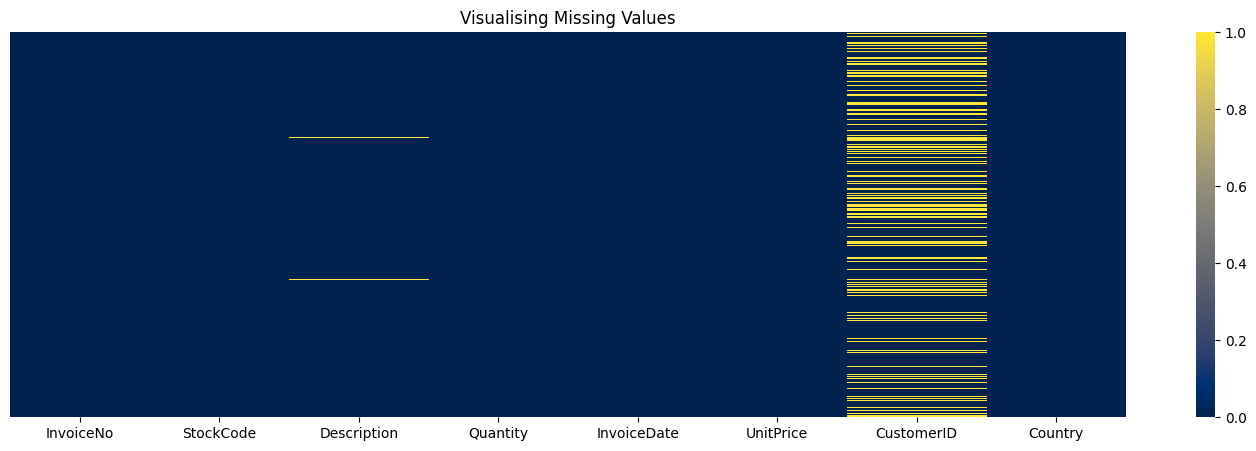

In [8]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(18,5))
sns.heatmap(df.isnull(),cmap='cividis',annot=False,yticklabels=False)
plt.title("Visualising Missing Values")

### **Observation**
**Missing values ​​in CustomerID and Description column.**

**is our Client ID identifier, so missing it means others will not be able to assist us in our analysis**

**Empty any missing information**AC

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406829, 8)

**Our data has been reduced. So we have 8 features and 406829 data points**

In [11]:
df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

* **Here we can see that the lowest value of the Quantity column is a negative number.**
* **Minimum value for UnitPrice is 0**
* **This line must be checked**

In [12]:
# DataFrame have negative valiues in quantity.
# Here we observed that Invoice number starting with C has negative and as per description of the data those are cancelation. so we need to drop this entries.
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [13]:
# CHanging the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [14]:
# Also if InvoiceNo starts with C means it's cancellation. We need to drop this entries.
df=df[~df['InvoiceNo'].str.contains('C')]

In [15]:
# Checking how many values are present for unitprice==0
# Almost 40 values are present so will drop this Values
len(df[df['UnitPrice']==0])

40

In [16]:
# Taking Unitprice Values grater than 0.
df=df[df['UnitPrice']>0]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [17]:
df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [18]:
df.shape

(397884, 8)

# **Feature Engineering**




In [19]:
# Converting InvoiceDate to datetime. InvoiceDate is in formate of 01-12-2010 08:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [20]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"]=df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"]=df["InvoiceDate"].apply(lambda x: x.day)
df["hour"]=df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"]=df["InvoiceDate"].apply(lambda x: x.minute)

In [21]:
# Extracting month from the Invoice date
df['Month'] = df['InvoiceDate'].dt.month_name()

In [22]:
# Extracting month from the Invoice date
df['Day'] = df['InvoiceDate'].dt.day_name()

In [23]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [24]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount  
0        1     8      26  December  Wednesday        15.30  
1        1     8      26  December  Wednesday        20.34  
2        1     8      26  December  Wednesday        22.00  
3        1     8      26  December  Wednesday        20.34  
4        1     8      26  December  Wednesday        20.34

# **EDA(Exploratory Data Analysis)**

In [25]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [26]:
top_10_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

Product_name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1723
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1396
5             LUNCH BAG RED RETROSPOT   1316
6   SET OF 3 CAKE TINS PANTRY DESIGN    1159
7             LUNCH BAG  BLACK SKULL.   1105
8                             POSTAGE   1099
9     PACK OF 72 RETROSPOT CAKE CASES   1068

## **Top 10 items in term if description(Name)**

Text(0.5, 1.0, 'Top 10 Products')

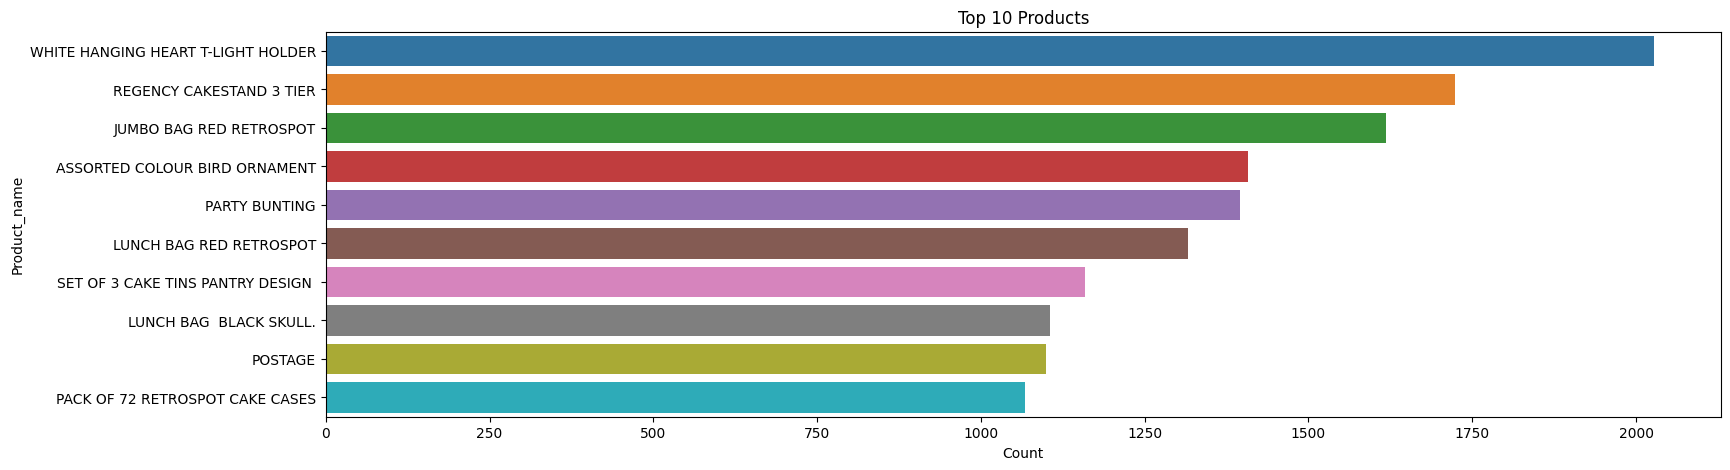

In [27]:
# top 10 product in trems of description
plt.figure(figsize=(18,5))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 Products')
plt.title('Top 10 Products')


### **Observation**
* **White Hanging Heart T-Light Stand, best seller with almost 2018 units sold**
* **REGENCY CAKESTAND 3 TIER, second best seller with approximately 1723 items**

## **Bottom 10 items in trems of description(Name)**

In [28]:
bottom_10_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

Product_name  Count
3867  BLUE FELT HANGING HEART WITH FLOWER      1
3868           GLASS CAKE COVER AND PLATE      1
3869           CRACKED GLAZE EARRINGS RED      1
3870              SCALLOP SHELL SOAP DISH      1
3871     NECKLACE+BRACELET SET PINK DAISY      1
3872          RUBY GLASS CLUSTER EARRINGS      1
3873       PINK CHRYSANTHEMUMS ART FLOWER      1
3874      72 CAKE CASES VINTAGE CHRISTMAS      1
3875         WALL ART , THE MAGIC FOREST       1
3876          PAPER CRAFT , LITTLE BIRDIE      1

Text(0.5, 1.0, 'Bottom 10 Products')

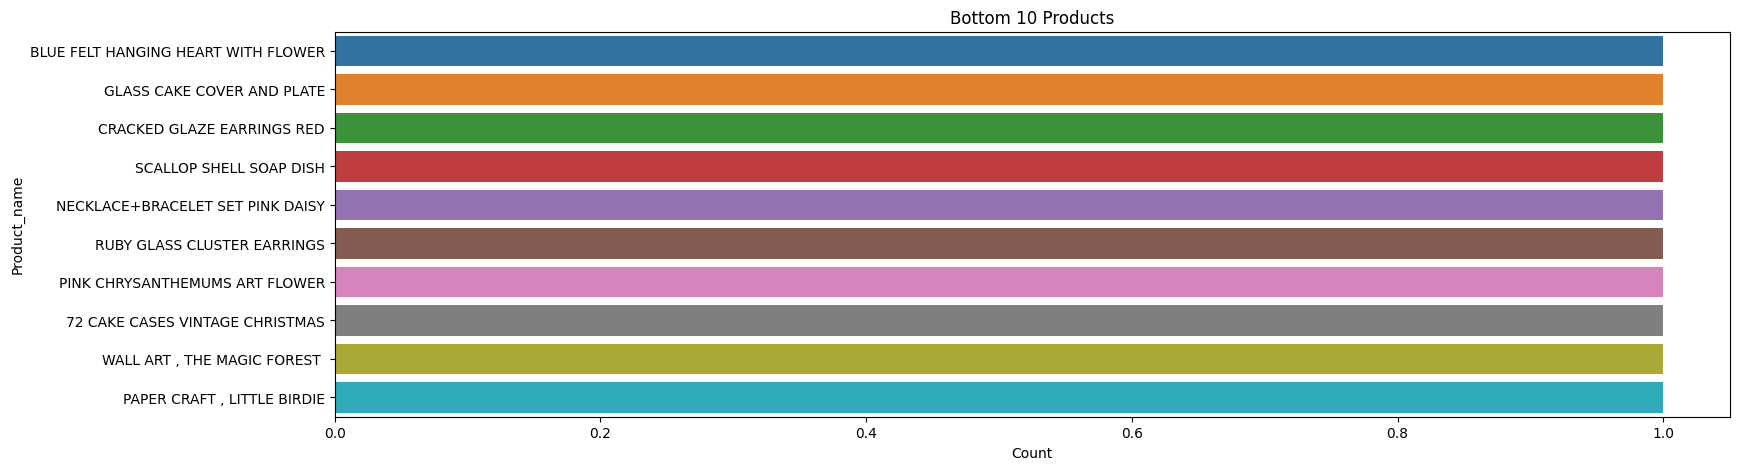

In [29]:
# Bottom 10 product in trems of description
plt.figure(figsize=(18,5))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 Products')

## **Top 10 itmes interm of StockCode.**

In [30]:
top_10_StockCodes=df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

StockCode  Count
0    85123A   2035
1     22423   1723
2    85099B   1618
3     84879   1408
4     47566   1396
5     20725   1317
6     22720   1159
7     20727   1105
8      POST   1099
9     23203   1098

Text(0.5, 1.0, 'Top 10 Product interms of Stock Code')

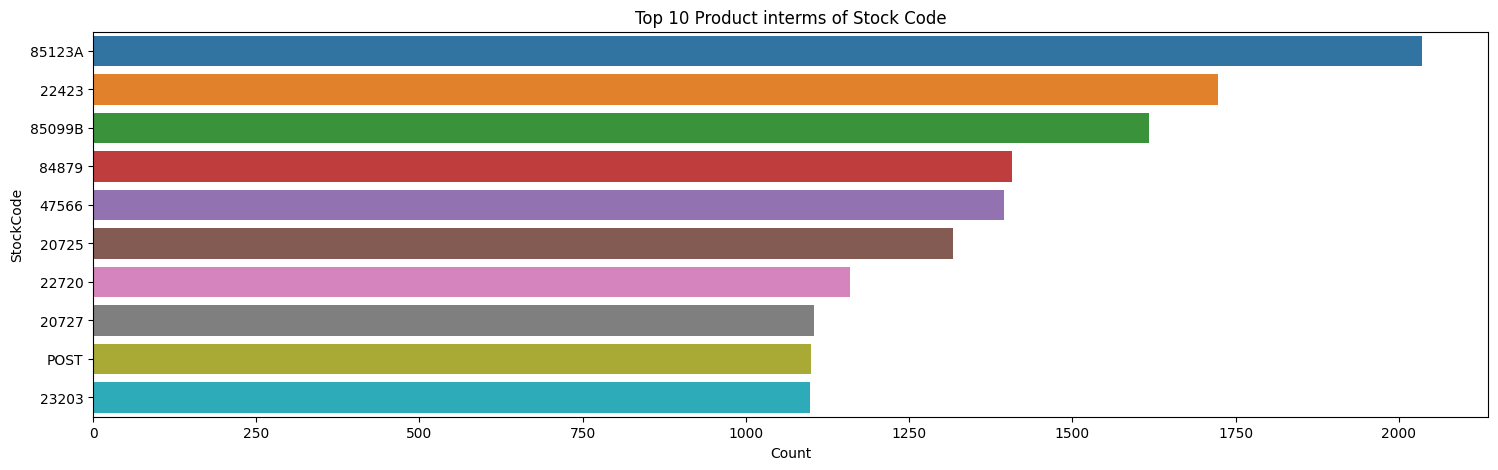

In [31]:
# Top 10 Product in terms of StockCode
plt.figure(figsize=(18,5))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 Product interms of Stock Code')

## **Observation**
* **StockCode-85123A is First best selling product..**
* **StockCode-22423 is the second best selling product.**

In [32]:
top_10_customers=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Product_purchasing_Count'}).head(10)
top_10_customers

CustomerID  Product_purchasing_Count
0     17841.0                      7847
1     14911.0                      5675
2     14096.0                      5111
3     12748.0                      4595
4     14606.0                      2700
5     15311.0                      2379
6     14646.0                      2076
7     13089.0                      1818
8     13263.0                      1677
9     14298.0                      1637

Text(0.5, 1.0, 'Top 10 frequent Customers.')

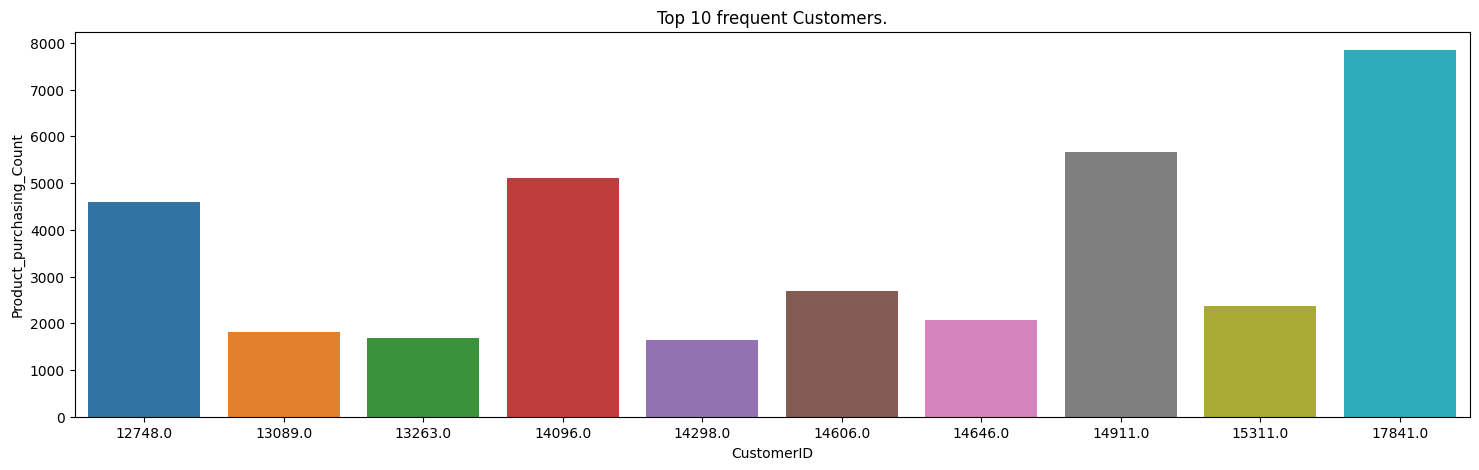

In [33]:
# Top 10 frequent Customer
plt.figure(figsize=(18,5))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Product_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

## **Observation**
* **CustomerID- 17841 bought the most products**
* **CustomerID-14911 second customer**


In [34]:
top_5_countries=df['Country'].value_counts().reset_index().rename(columns={'index':'Country' 'Customer_count'})
top_5_countries

CountryCustomer_count  Country
0         United Kingdom   354321
1                Germany     9040
2                 France     8341
3                   EIRE     7236
4                  Spain     2484
5            Netherlands     2359
6                Belgium     2031
7            Switzerland     1841
8               Portugal     1462
9              Australia     1182
10                Norway     1071
11                 Italy      758
12       Channel Islands      748
13               Finland      685
14                Cyprus      614
15                Sweden      451
16               Austria      398
17               Denmark      380
18                Poland      330
19                 Japan      321
20                Israel      248
21           Unspecified      244
22             Singapore      222
23               Iceland      182
24                   USA      179
25                Canada      151
26                Greece      145
27                 Malta      112
28  United Arab Emirates       68
29    European Community       60
30                   RSA       57
31               Lebanon       45
32             Lithuania       35
33                Brazil       32
34        Czech Republic       25
35               Bahrain       17
36          Saudi Arabia        9

Text(0.5, 1.0, 'Top 5 Countires based on highest number of customers')

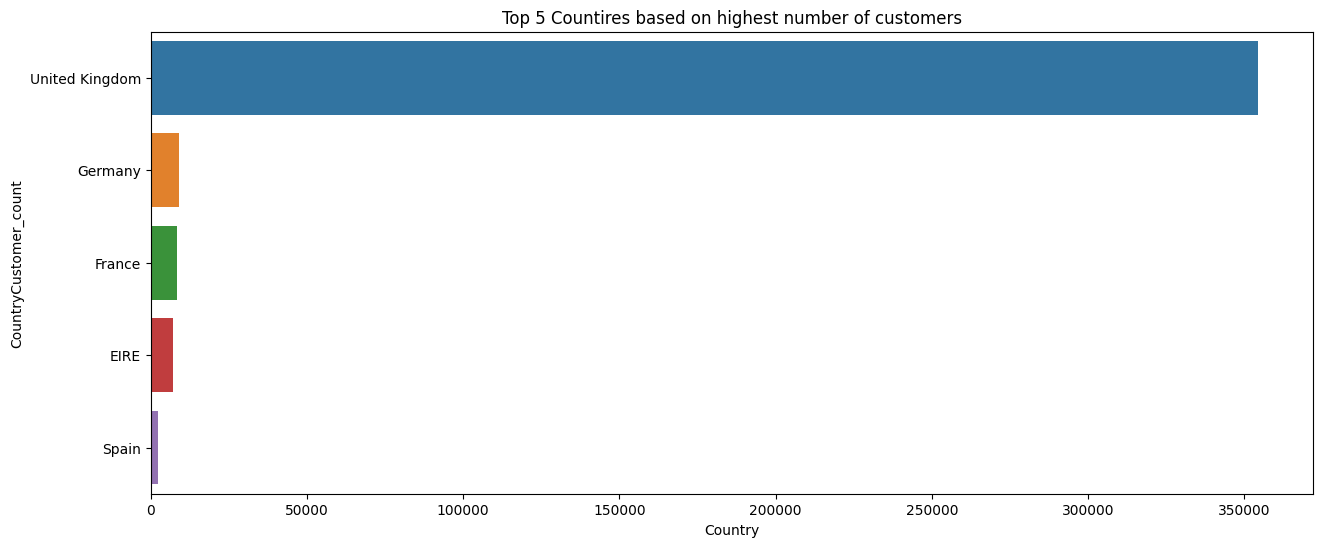

In [35]:
# Top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['CountryCustomer_count'].head(5))
plt.title('Top 5 Countires based on highest number of customers')

## **Observation**
* **UK has the most customers**
* **Germany, France and Ireland have equal customers**

Text(0.5, 1.0, 'Top 5 Countires based on highest number of customers')

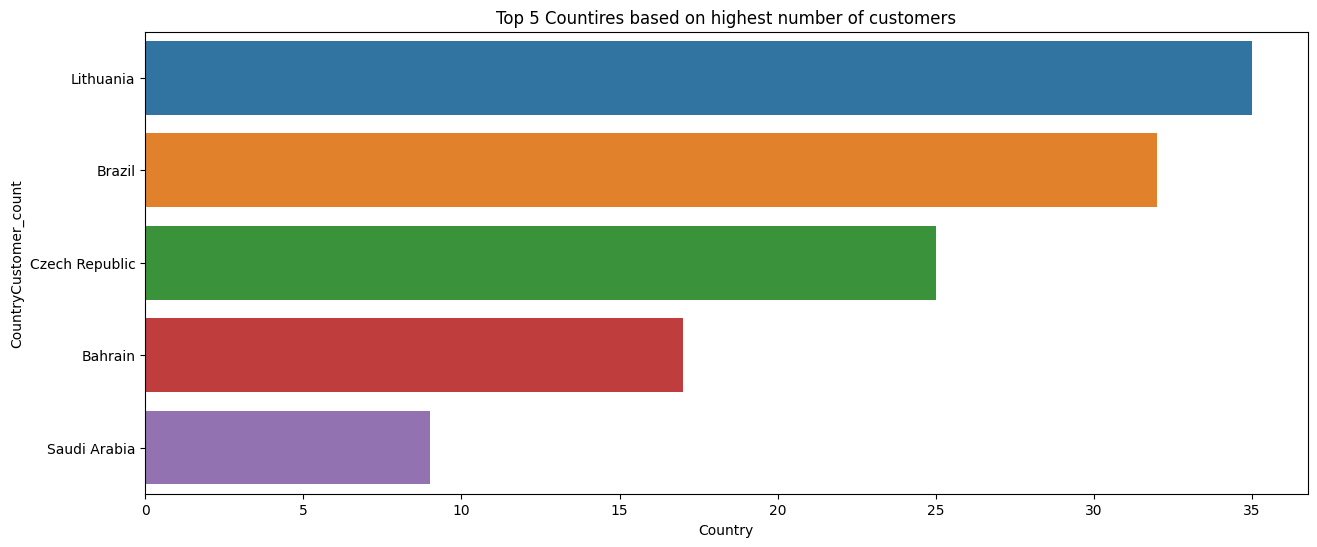

In [36]:
# Top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['CountryCustomer_count'].tail(5))
plt.title('Top 5 Countires based on highest number of customers')

## **Observation**
* **More customers than Saudi Arabia**
* **Bahrain is the country with the second lowest number of customers**

In [37]:
sales_in_month=df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

Month  Sales_count
0    November        64531
1     October        49554
2    December        43461
3   September        40028
4         May        28320
5        June        27185
6       March        27175
7      August        27007
8        July        26825
9       April        22642
10    January        21229
11   February        19927

Text(0.5, 1.0, 'Sales count in different MOnth')

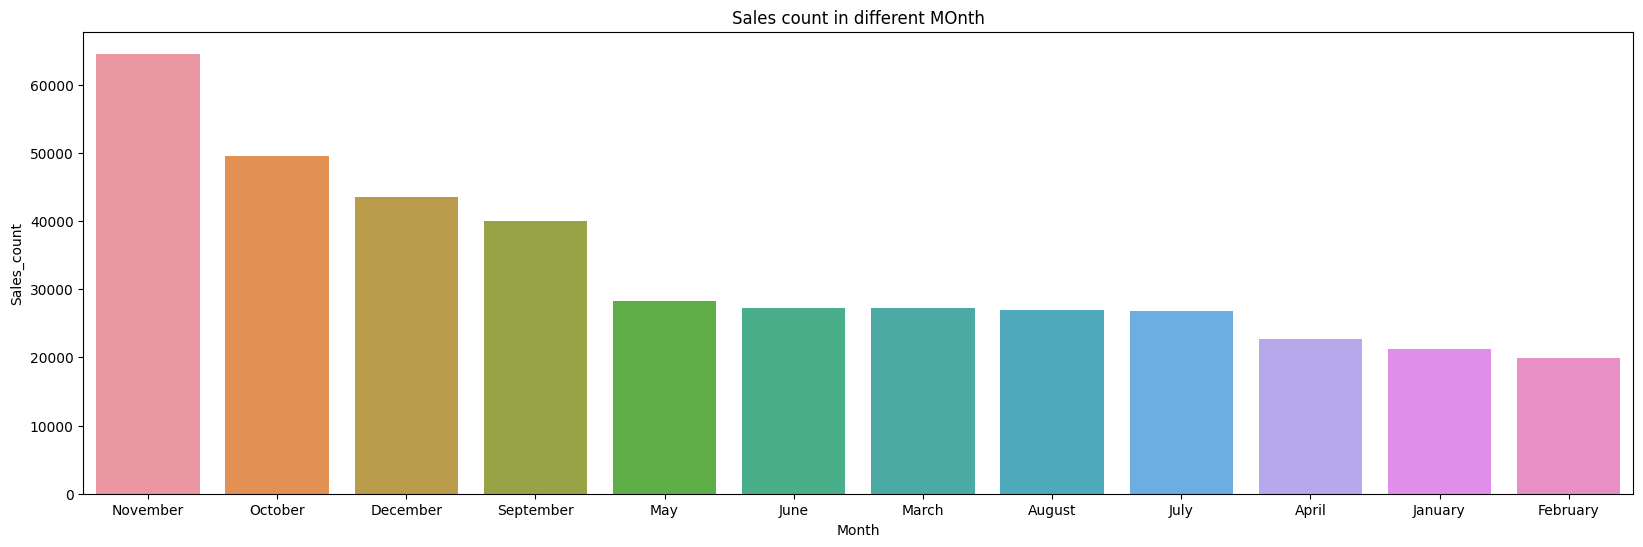

In [38]:
#Sales Count in Different months
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different MOnth')

##**Observation**
* **Most of the sales take place in November.**
* **The lowest sales were realized in February.**

In [39]:
sales_on_day_basis=df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

Day  Sale_count
0   Thursday       80035
1  Wednesday       68885
2    Tuesday       66473
3     Monday       64893
4     Sunday       62773
5     Friday       54825

Text(0.5, 1.0, 'Sales Count On Different Days')

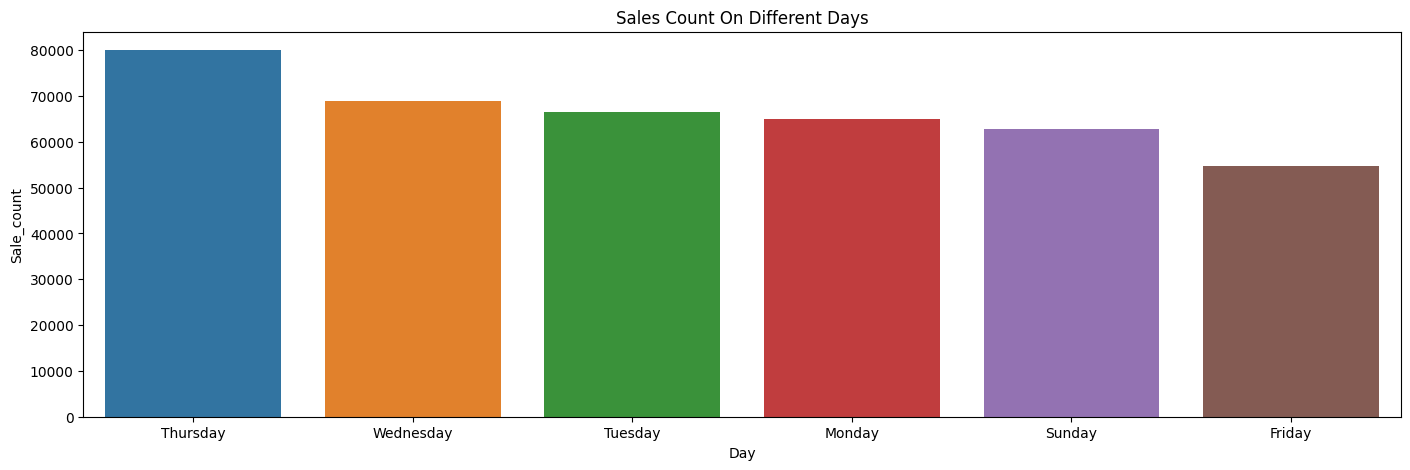

In [40]:
# Sales Count On different days
plt.figure(figsize=(17,5))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales Count On Different Days')

## **Observation**
* **Thursday sales are very high.**
* **Very limited discount on Friday**

In [41]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [42]:
def time(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'


In [43]:
df['Day_time_type']=df['hour'].apply(time)

In [44]:
sales_timing = df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

Day_time_type  Sales_count
0     Afternoon       272738
1       Morning       118095
2       Evening         7051

Text(0.5, 1.0, 'Sales Count in Different day Timings')

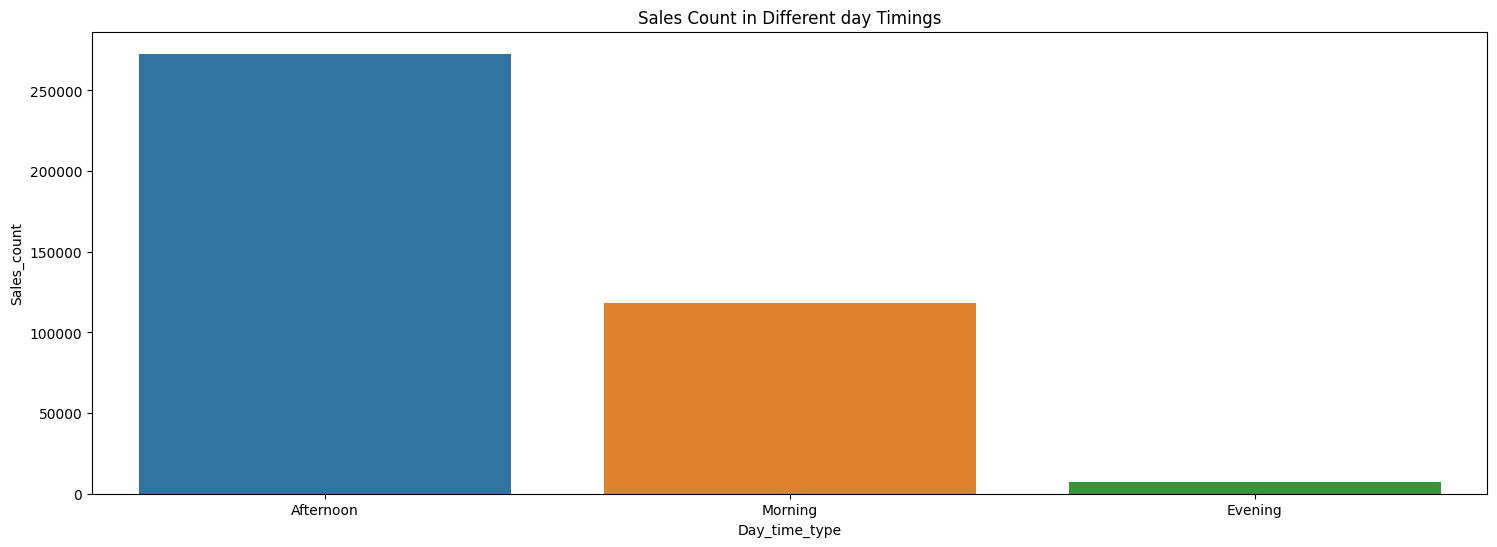

In [45]:
# Sales count on different days.
plt.figure(figsize=(18,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title ('Sales Count in Different day Timings')

## **Observation**

* **Sales usually take place in the afternoon.**
* **There are fewer sales at night.**

In [46]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [47]:
avg_amount=df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)

In [48]:
avg_amount

CustomerID  Avg_amount_per_customer
0        12346.0             77183.600000
3008     16446.0             56157.500000
2011     15098.0             13305.500000
2502     15749.0              4453.430000
2087     15195.0              3861.000000
...          ...                      ...
3590     17254.0                 2.432500
697      13271.0                 2.264375
990      13684.0                 2.241000
3995     17816.0                 2.150588
2315     15503.0                 2.101286

[4338 rows x 2 columns]

Text(0.5, 1.0, 'Average Amount Spent By Each Customer')

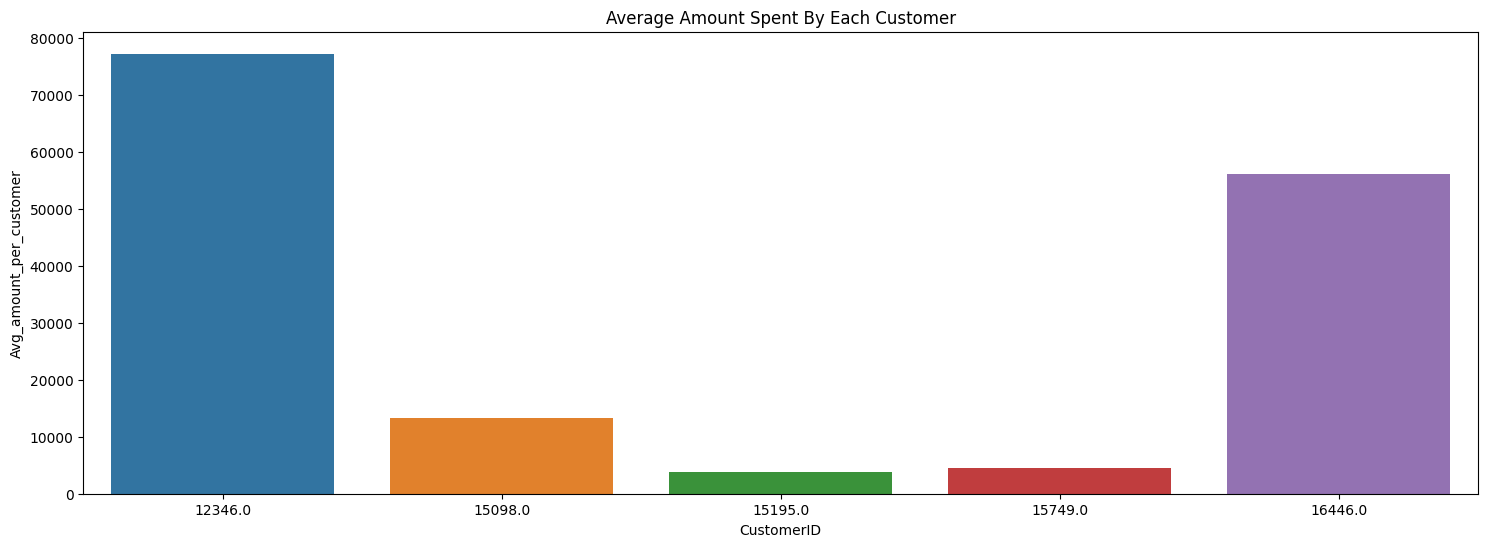

In [49]:
# Sales Count on different days
plt.figure(figsize=(18,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average Amount Spent By Each Customer')

### **Observation**
* **77183 (USD) is the highest average used by CustomerID-12346**
* **56157 (USD) is the second highest average used by CustomerID-16446**

# **Model Building**

## **RFM Model Analysis:**

###**What is RFM?**
**RFM (Recency, Frequency, Monetary)** analytics is a customer segmentation technique widely used in marketing and analytics. Helps businesses understand and identify customers based on three key factors:
* How long ago did they shop **(Recency)**,
* How often did they buy goods **(frequency)**,
* How often did they buy goods buy **( Monetary)**.

RFM analysis allows businesses to identify and target different customers through customized marketing strategies.

### **Why it is Needed?**
RFM Analysis is a business framework for understanding and analyzing customer behavior based on three factors on RECENCY, FREQUENCY and MONETARY.

RFM analysis will help businesses segment their customers into different groups so that they can interact with each group through different marketing strategies.


In [50]:
rfm_dataframe=df.copy()

In [51]:
rfm_dataframe.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount Day_time_type  
0        1     8      26  December  Wednesday        15.30       Morning  
1        1     8      26  December  Wednesday        20.34       Morning  
2        1     8      26  December  Wednesday        22.00       Morning  
3        1     8      26  December  Wednesday        20.34       Morning  
4        1     8      26  December  Wednesday        20.34       Morning

In [52]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [53]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

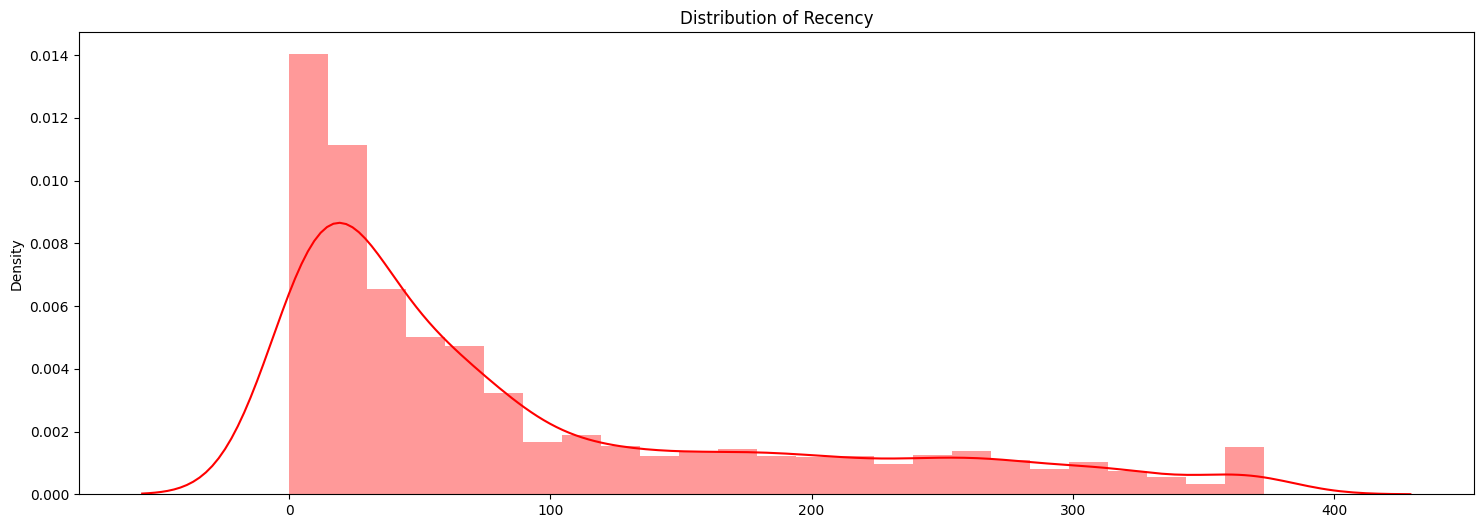

In [54]:
plt.figure(figsize=(18,6))
sns.distplot(x=rfm_dataframe['Recency'],color='red')
plt.title('Distribution of Recency')

**The new distribution is skewed to the right.**

In [55]:
# Descriptive Stats = frequency
rfm_dataframe['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

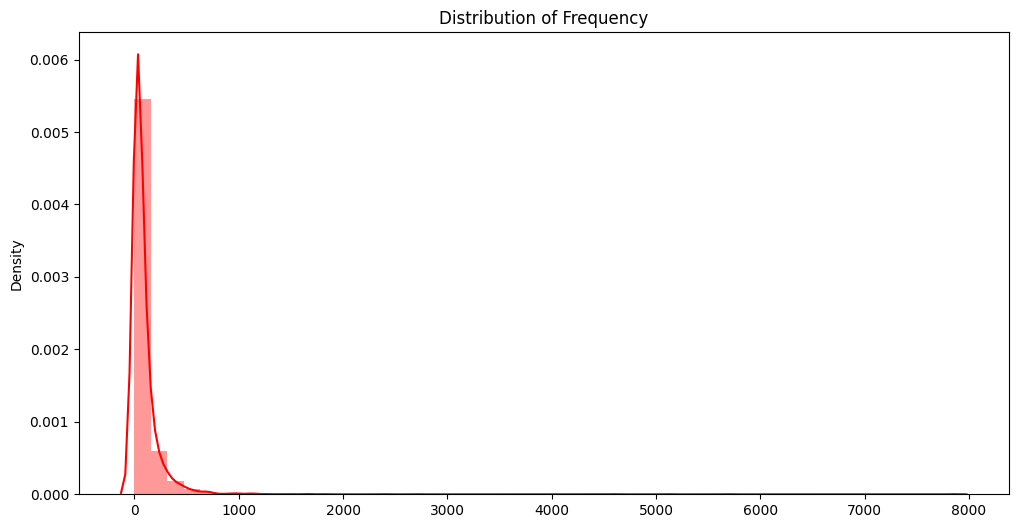

In [56]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'],color='red')
plt.title('Distribution of Frequency')

**The new distribution is skewed to the right.**

In [57]:
# Descriptive Stats = Monetary
rfm_dataframe['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

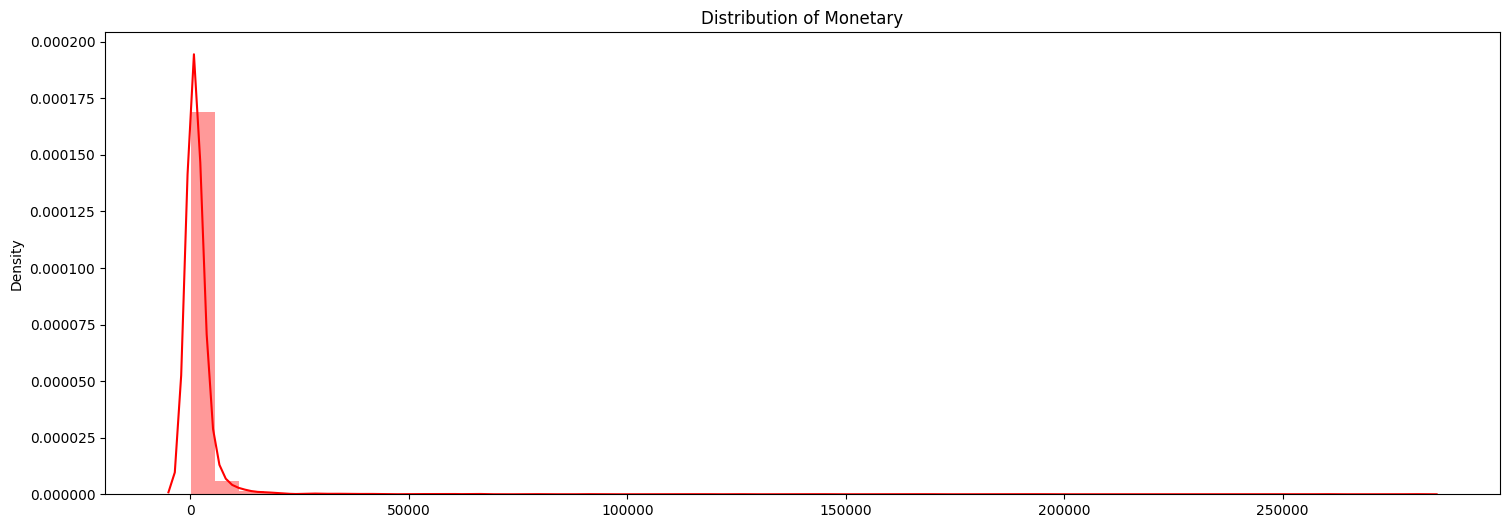

In [58]:
plt.figure(figsize=(18,6))
sns.distplot(x=rfm_dataframe['Monetary'],color='red')
plt.title('Distribution of Monetary')

**The new distribution is skewed to the right.**

In [59]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])


In [60]:
quantile = quantile.to_dict()

In [61]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [62]:
# Convert quantiles to a dictionary, easier to use
# quantile = quantiles.to_dict()
# Function to Create R, F and M segments
# argument (X= value, p = Recency, Monetry_value,frequency, d = Quartiles dict)
# lower the Recency, good for the Company

def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif  x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

# Arguments (X = Value, p = recency, monetary_value, frequency, d = quartiles dict)
# Higher Value of frequecny and monetray lead to a good consumer. Here higher value = 1 in reverse way.


def FnMScoring(x,p,d):
  if x<= d[p][0.25]:
    return 4
  elif x<= d[p][0.50]:
    return 3
  elif x<= d[p][0.50]:
    return 2
  else:
    return 1

In [63]:
# This Code was for understanding the above code function
if 18<= quantile['Recency'][0.25]:
  print(1)
else:
  print('Great')

Great


In [64]:
# Calculating and adding R,F and M segment values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  1  1
12350.0         310         17    334.40  4  4  3

In [65]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [66]:
# Calculate and Add RFMScore Value Column Showing total SUm of RFMGroup Value
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R','F','M']].sum(axis=1)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  1  1       211          4
12350.0         310         17    334.40  4  4  3       443         11

In [67]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [68]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  4, 11, 12,  6,  5, 10,  8])

In [69]:
# Assign Loyelty Level to each Customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']
score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q=4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = score_cut.values
rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0        2        182   4310.00  1  1  1       111          3   
2     12348.0       75         31   1797.24  3  3  1       331          7   
3     12349.0       18         73   1757.55  2  1  1       211          4   
4     12350.0      310         17    334.40  4  4  3       443         11   

  RFM_Loyalty_Level  
0            Silver  
1         Platinaum  
2              Gold  
3         Platinaum  
4             Bronz

In [70]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  4, 11, 12,  6,  5, 10,  8])

In [71]:
# Validate the data for RFM group =111
rfm_dataframe[rfm_dataframe['RFM_Group']=='111'].sort_values("Monetary",ascending=False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     14156.0        9       1400  117379.63  1  1  1       111          3   
5     17511.0        2        963   91062.38  1  1  1       111          3   
6     16684.0        4        277   66653.56  1  1  1       111          3   
7     14096.0        4       5111   65164.79  1  1  1       111          3   
8     13694.0        3        568   65039.62  1  1  1       111          3   
9     15311.0        0       2379   60767.90  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

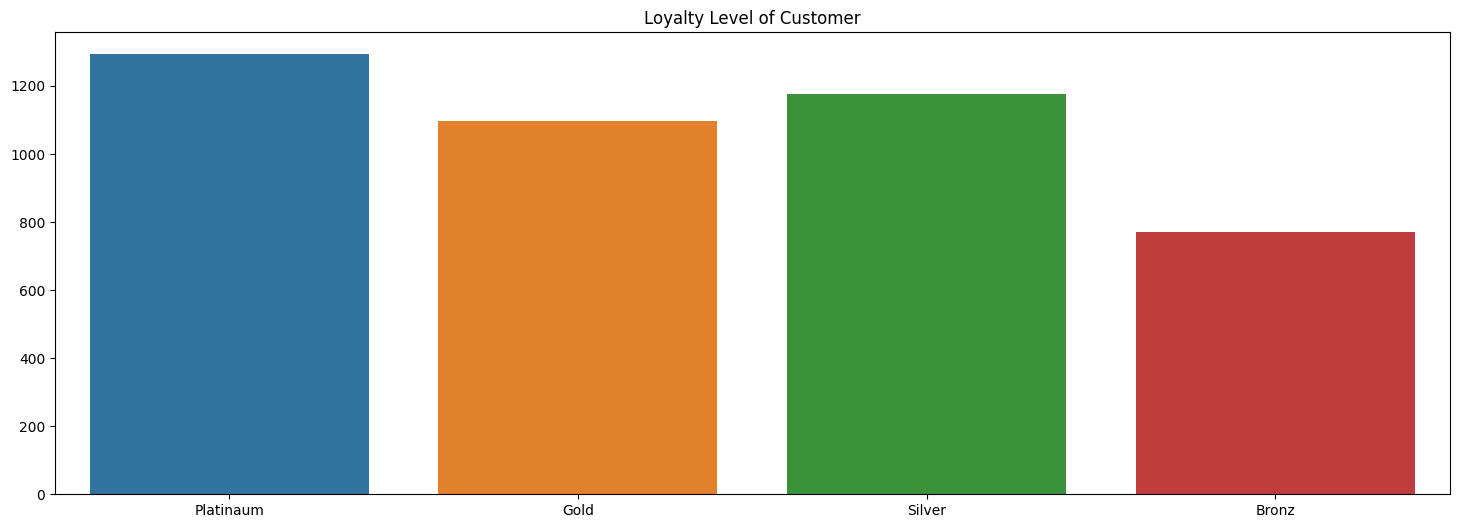

In [72]:
# plot the loyelty level
loyalty_counts = rfm_dataframe['RFM_Loyalty_Level'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values)
plt.title('Loyalty Level of Customer')
plt.show()

In [73]:
#following table contains our target people
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] =='Platinaum'].sort_values("Monetary",ascending=False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   
5     14156.0        9       1400  117379.63  1  1  1       111          3   
6     17511.0        2        963   91062.38  1  1  1       111          3   
7     16029.0       38        242   81024.84  2  1  1       211          4   
8     16684.0        4        277   66653.56  1  1  1       111          3   
9     14096.0        4       5111   65164.79  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [74]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [75]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency':['mean','min','max'],
    'Frequency':['mean','min','max'],
    'Monetary':['mean','min','max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           16.708430   0   50  216.255994  42  7847  4952.024541   
Gold                71.890710   0  372   73.465392   1   543  1503.466786   
Silver             111.744265   1  373   24.778250   1   132   598.369432   
Bronz              217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          675.27  280206.02  1293  
Gold               120.03  168472.50  1098  
Silver               6.90   77183.60  1177  
Bronz                3.75     660.00   770

In [76]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
  if num <= 0:
    return 1
  else:
    return num
#Apply handle_neg_n_zero funtion to Recency and Monetary Columns
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero (x) for x in rfm_dataframe.Monetary]

In [77]:
# Perfrom Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency','Frequency','Monetary']].apply(np.log, axis = 1).round(3)

**Now let's see the Recency, frequency and Monetary distribution.**

Text(0.5, 1.0, 'Distribution of Recency')

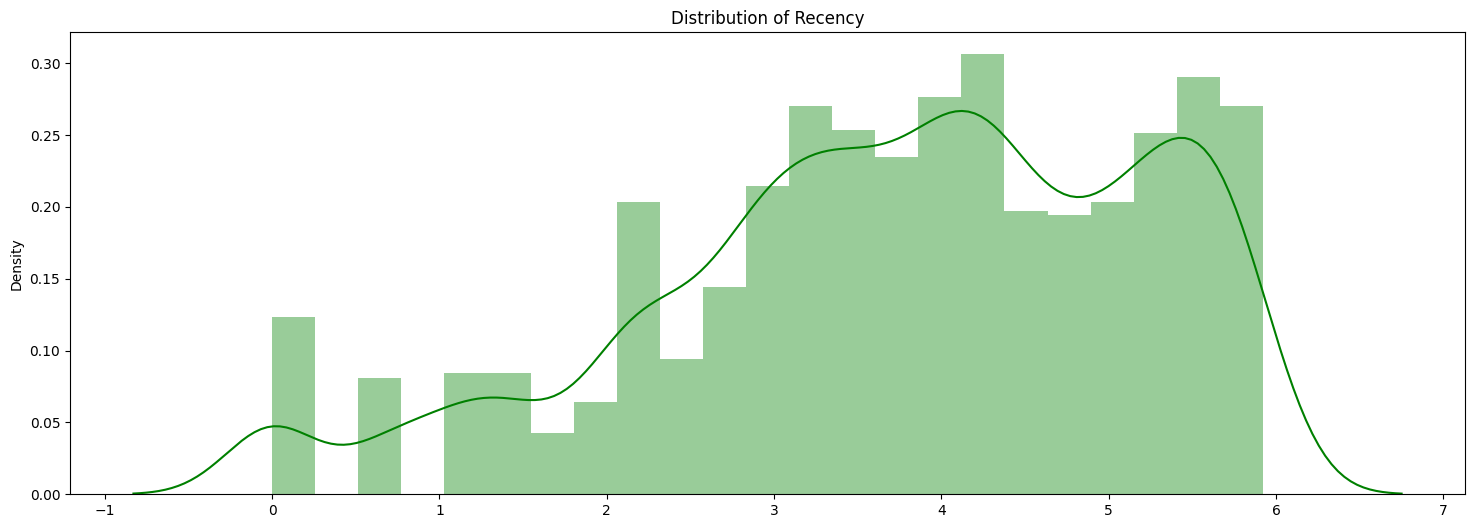

In [78]:
plt.figure(figsize=(18,6))
sns.distplot(x=Log_rfm_df['Recency'],color='green')
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

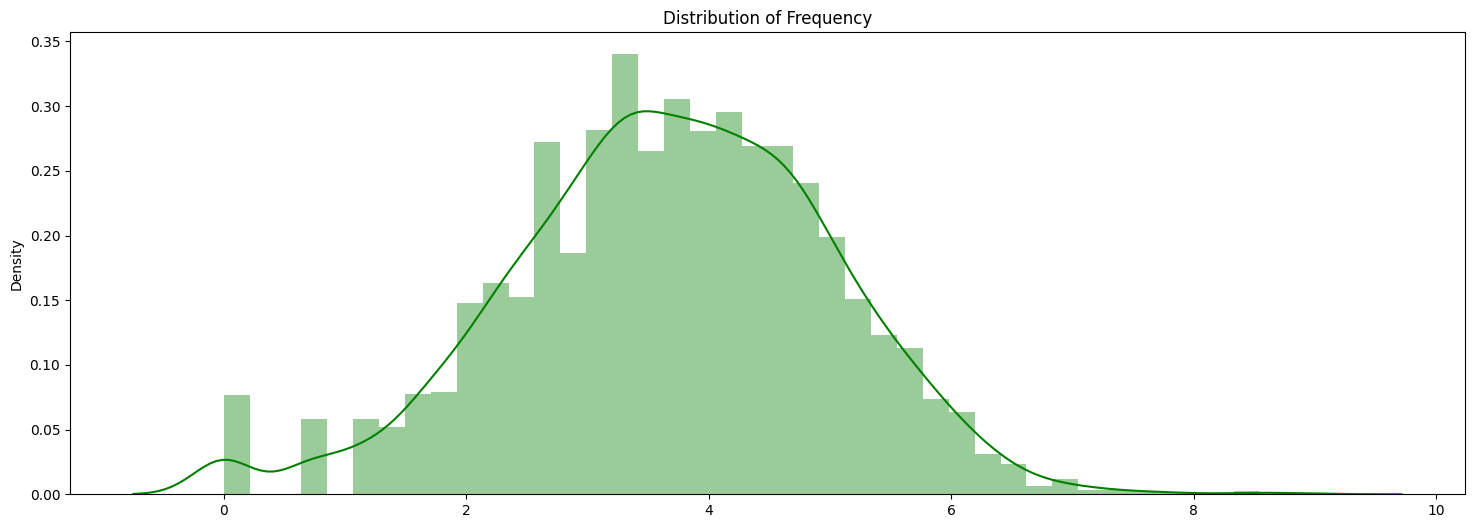

In [79]:
plt.figure(figsize=(18,6))
sns.distplot(x=Log_rfm_df['Frequency'],color='green')
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

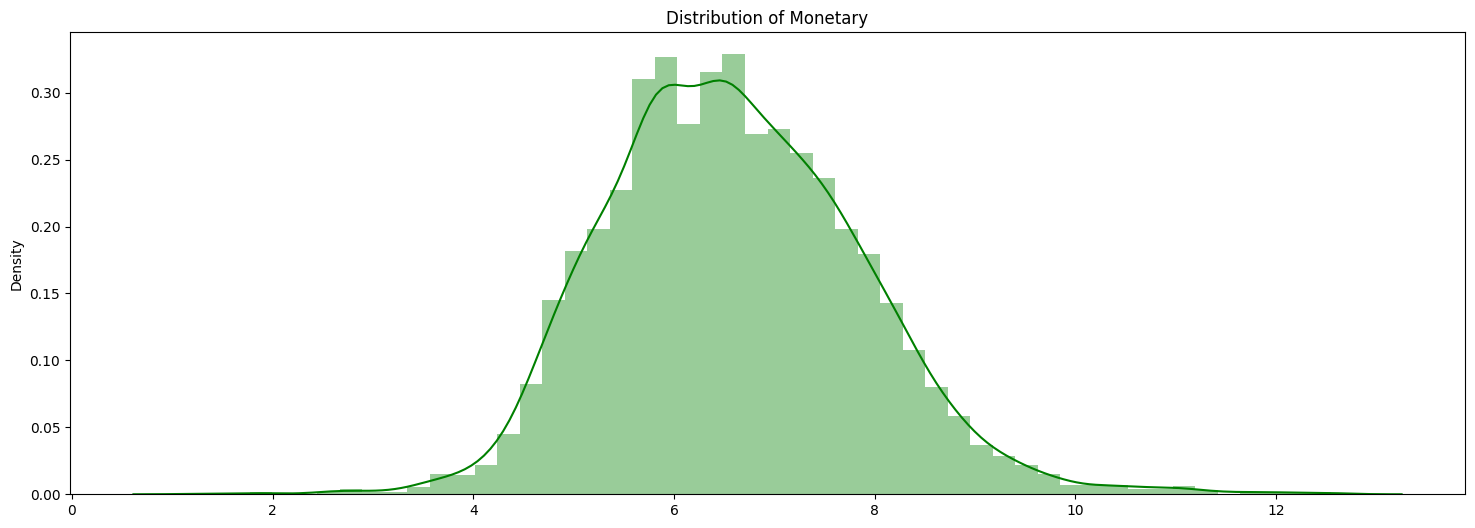

In [80]:
plt.figure(figsize=(18,6))
sns.distplot(x=Log_rfm_df['Monetary'],color='green')
plt.title('Distribution of Monetary')

In [81]:
rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [82]:
rfm_dataframe

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  1  1       211          4   
12350.0         310         17    334.40  4  4  3       443         11   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277         10    180.60  4  4  4       444         12   
18281.0         180          7     80.82  4  4  4       444         12   
18282.0           7         12    178.05  1  4  4       144          9   
18283.0           3        756   2094.88  1  1  1       111          3   
18287.0          42         70   1837.28  2  1  1       211          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  
CustomerID                                                              
12346.0               Silver     5.783825       0.000000     11.253942  
12347.0            Platinaum     0.693147       5.204007      8.368693  
12348.0                 Gold     4.317488       3.433987      7.494007  
12349.0            Platinaum     2.890372       4.290459      7.471676  
12350.0                Bronz     5.736572       2.833213      5.812338  
...                      ...          ...            ...           ...  
18280.0                Bronz     5.624018       2.302585      5.196285  
18281.0                Bronz     5.192957       1.945910      4.392224  
18282.0               Silver     1.945910       2.484907      5.182064  
18283.0            Platinaum     1.098612       6.628041      7.647252  
18287.0            Platinaum     3.737670       4.248495      7.516041  

[4338 rows x 12 columns]

# **KMeans Clustering**

In [83]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [84]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**Before using the Kmeans clustering algorithm, we need to decide on the number of clusters we will input into the algorithm. Therefore, we will use Elbow's method to find the minimum number of required groups.**

##**Recency and Monetary**---------------

# **KMeans Clustering**

**Before using the Kmeans clustering algorithm, we need to decide on the number of clusters we will input into the algorithm. Therefore, we will use Elbow's method to find the minimum number of required groups.**

##**(1) Applying Elbow Method on Recency And Monetary**

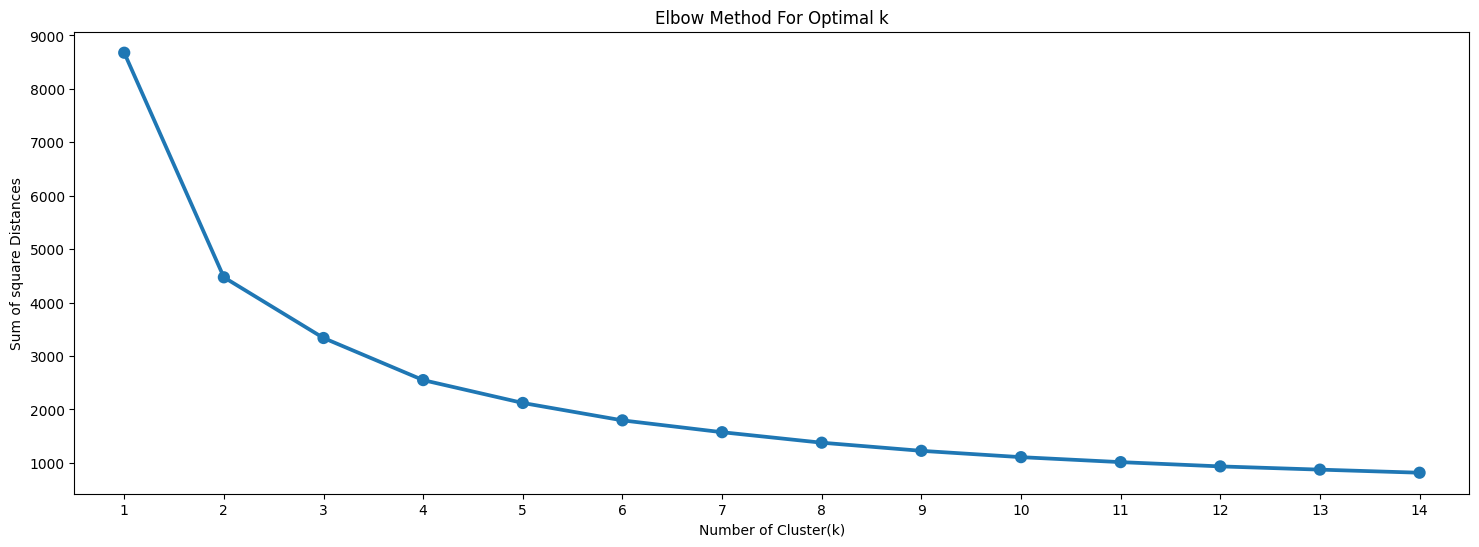

In [85]:
# Taking Recency and Monetory_log in list
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

#Standardising the data
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

#applying Eblow Method
wcss = {}
for k in range(1,15):
  km = KMeans(n_clusters=k, init= 'k-means++', max_iter=1000)
  km = km.fit(X)
  wcss[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize =(18,6))
sns.pointplot(x=list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Cluster(k)')
plt.ylabel('Sum of square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


###**Here we can see that the optimal value for the group is 2.**

### **Cross Verifying with ElbowVisualizer**
The elbow method is a heuristic used to determine the number of clusters in a dataset. The method consists of a method that defines the change as a function of the number of groups and selects the elbow of the curve according to the number of groups used.

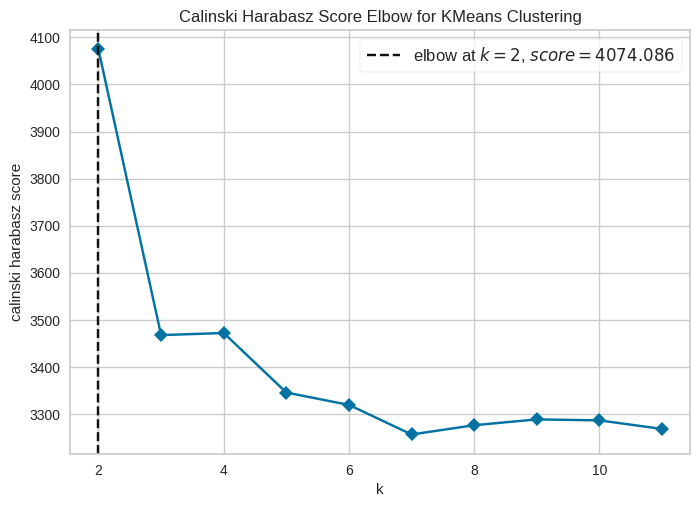

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [86]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the Clustering model and Visualizer
model = KMeans()
visualizer = KElbowVisualizer(
   model, k=(2,12), metric= 'calinski_harabasz', timings=False
)

visualizer.fit(X)        #Fit the data to the Visualizer
visualizer.show()        # Finalize and render the figure

**Elbow Visualizer also provides group=2**

###**Silhouette Score**
**Validating above optimal cluster value(i.e optimal_cluster = 2)**

In [87]:
# Taking Recency and Monetory_log in list.
Recency_and_Monetary_feat = ['Recency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

#Standardising the data
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Silhouette Score
range_n_clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters,random_state=1)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score (X,preds)
  print("For n_cluster = {}, silhouette score is {}".format(n_clusters,score))

For n_cluster = 2, silhouette score is 0.421461308316105
For n_cluster = 3, silhouette score is 0.3433470120059089
For n_cluster = 4, silhouette score is 0.3649058771514865
For n_cluster = 5, silhouette score is 0.3395250404488943
For n_cluster = 6, silhouette score is 0.3422201212043055
For n_cluster = 7, silhouette score is 0.34787086356830993
For n_cluster = 8, silhouette score is 0.33774535264866695
For n_cluster = 9, silhouette score is 0.3459604789419575
For n_cluster = 10, silhouette score is 0.3479066146663346
For n_cluster = 11, silhouette score is 0.33753966718471434
For n_cluster = 12, silhouette score is 0.3427273975494072
For n_cluster = 13, silhouette score is 0.34235758342627326
For n_cluster = 14, silhouette score is 0.3376357432302628
For n_cluster = 15, silhouette score is 0.33730368894983076


**Here we can see that the score profile for n_cluster = 2 is good compared to others. (A value close to 1 indicates that the data point is within the cluster and the data point is far away from the rest of the cluster.)**

For n_clusters = 2 The average silhouette _score is: 0.421461308316105
For n_clusters = 3 The average silhouette _score is: 0.3433470120059089
For n_clusters = 4 The average silhouette _score is: 0.3649058771514865
For n_clusters = 5 The average silhouette _score is: 0.3395250404488943
For n_clusters = 6 The average silhouette _score is: 0.3422201212043055
For n_clusters = 7 The average silhouette _score is: 0.34787086356830993
For n_clusters = 8 The average silhouette _score is: 0.33774535264866695
For n_clusters = 9 The average silhouette _score is: 0.3459604789419575
For n_clusters = 10 The average silhouette _score is: 0.3479066146663346


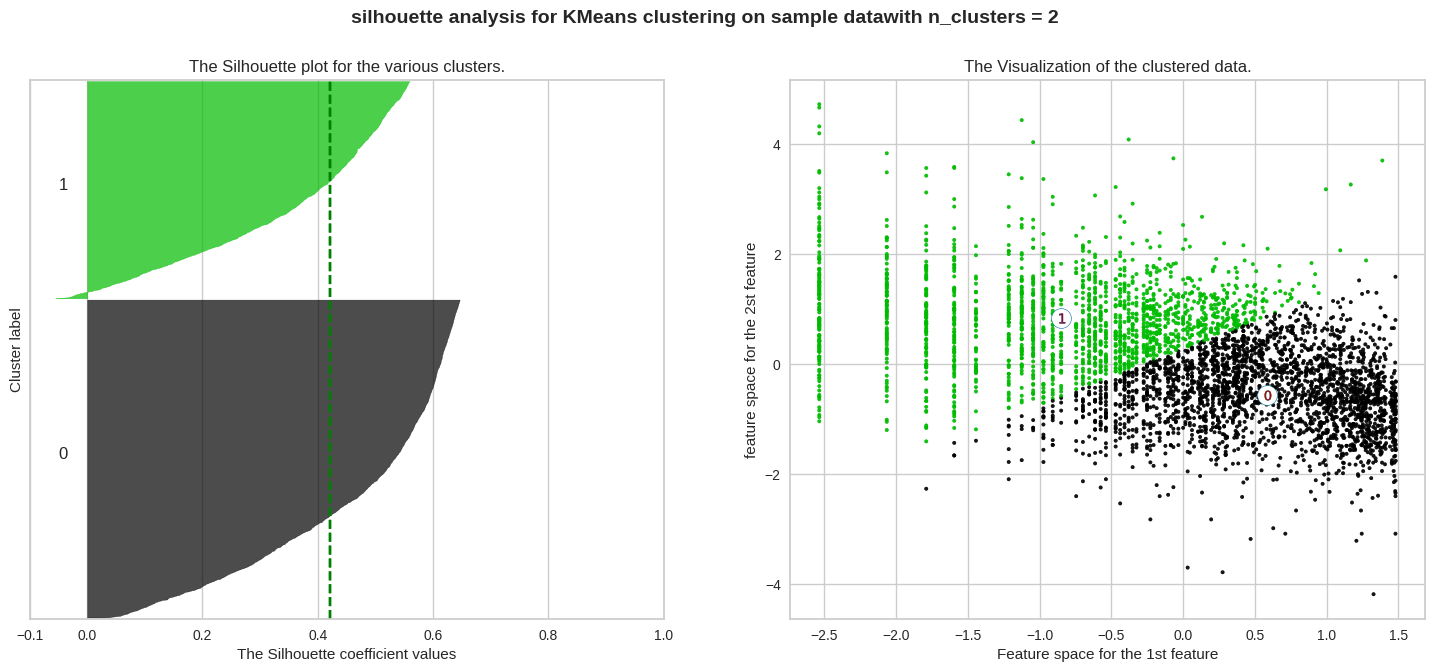

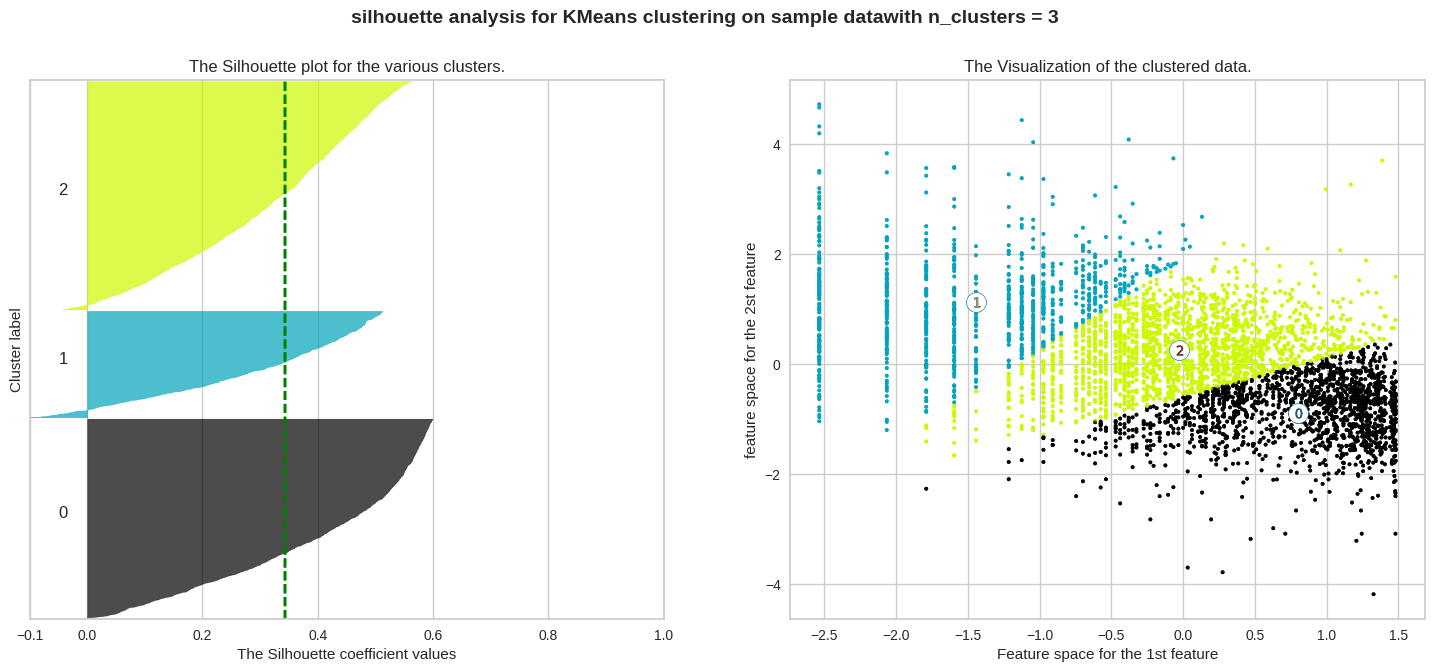

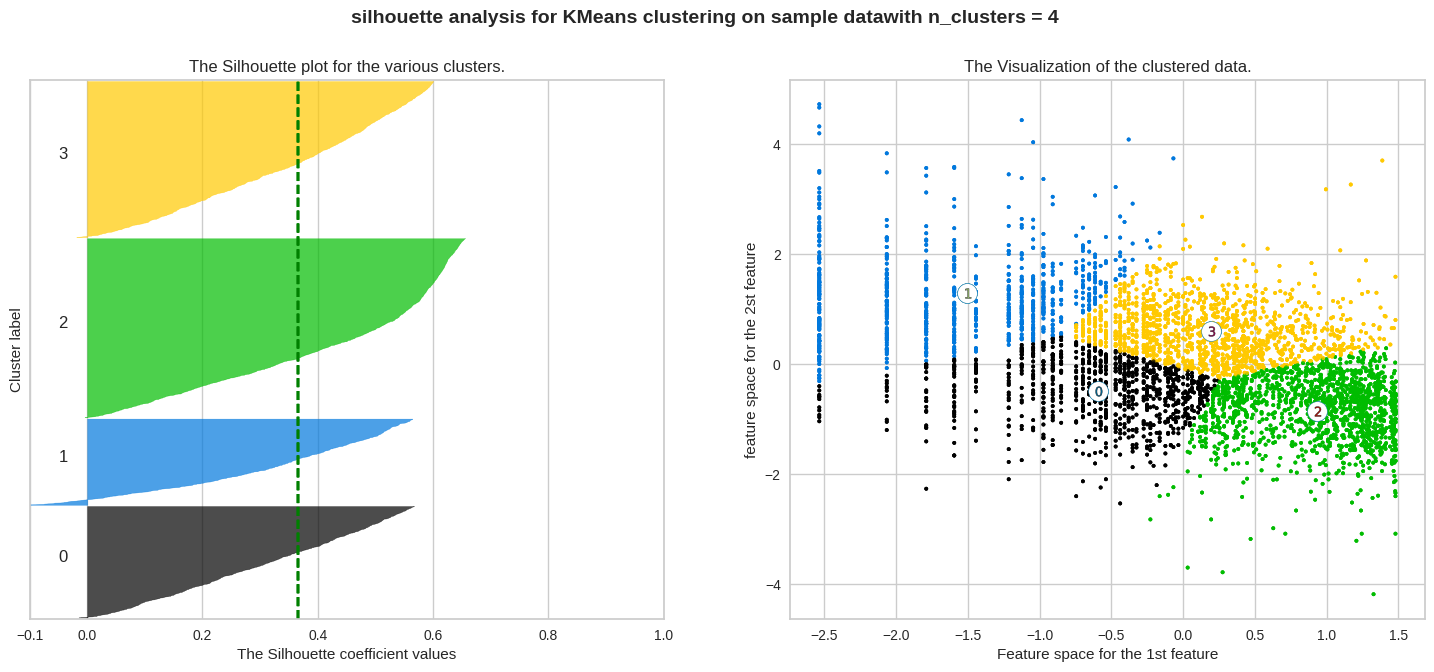

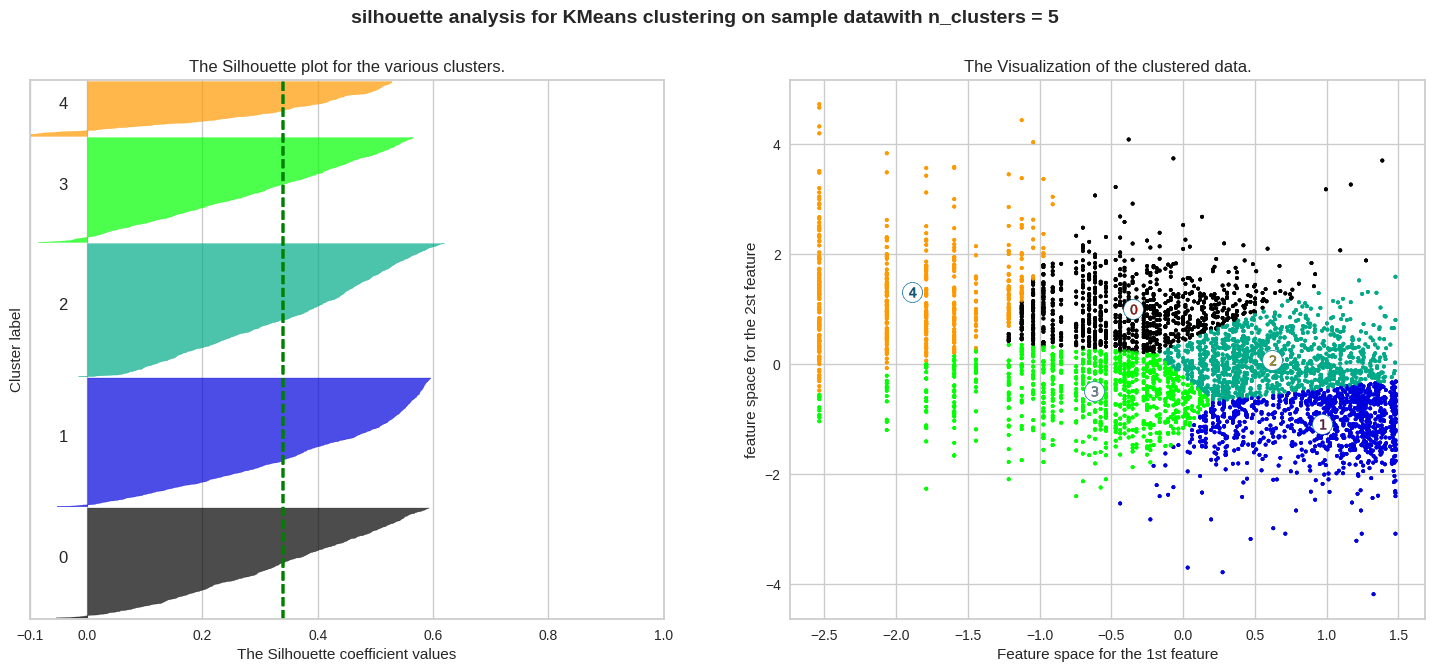

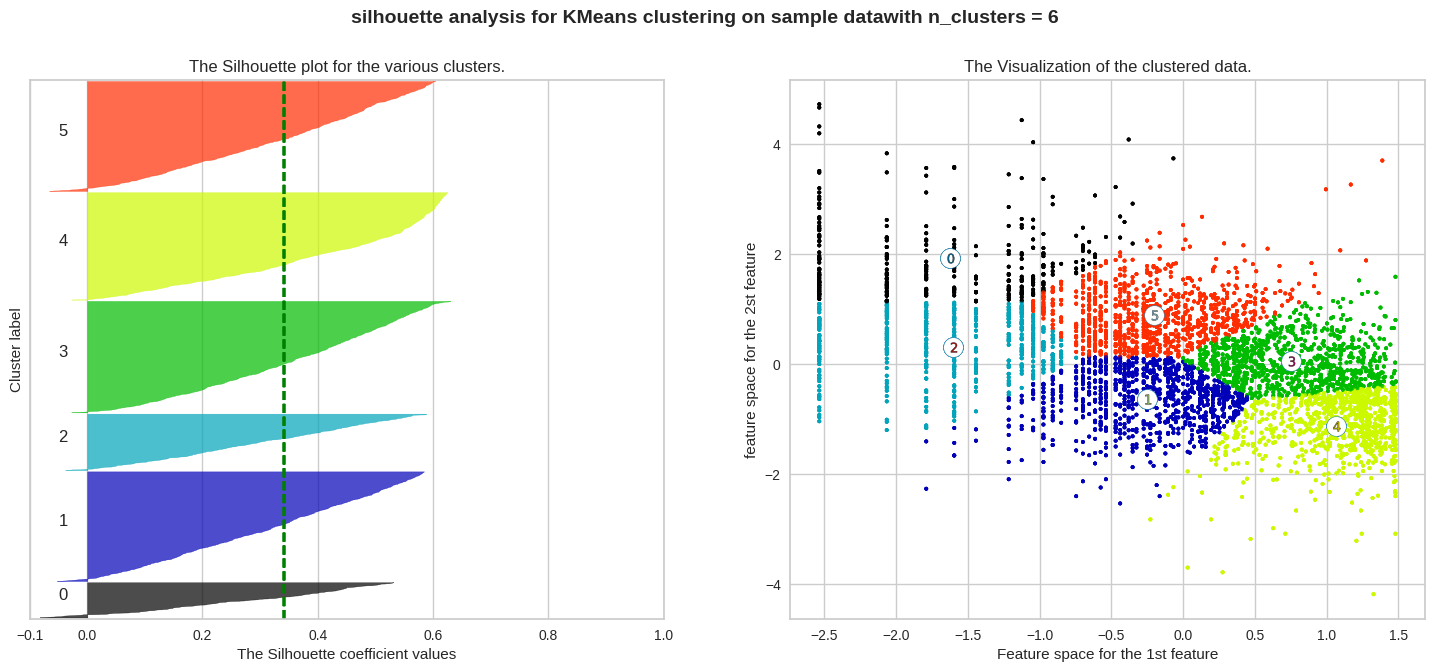

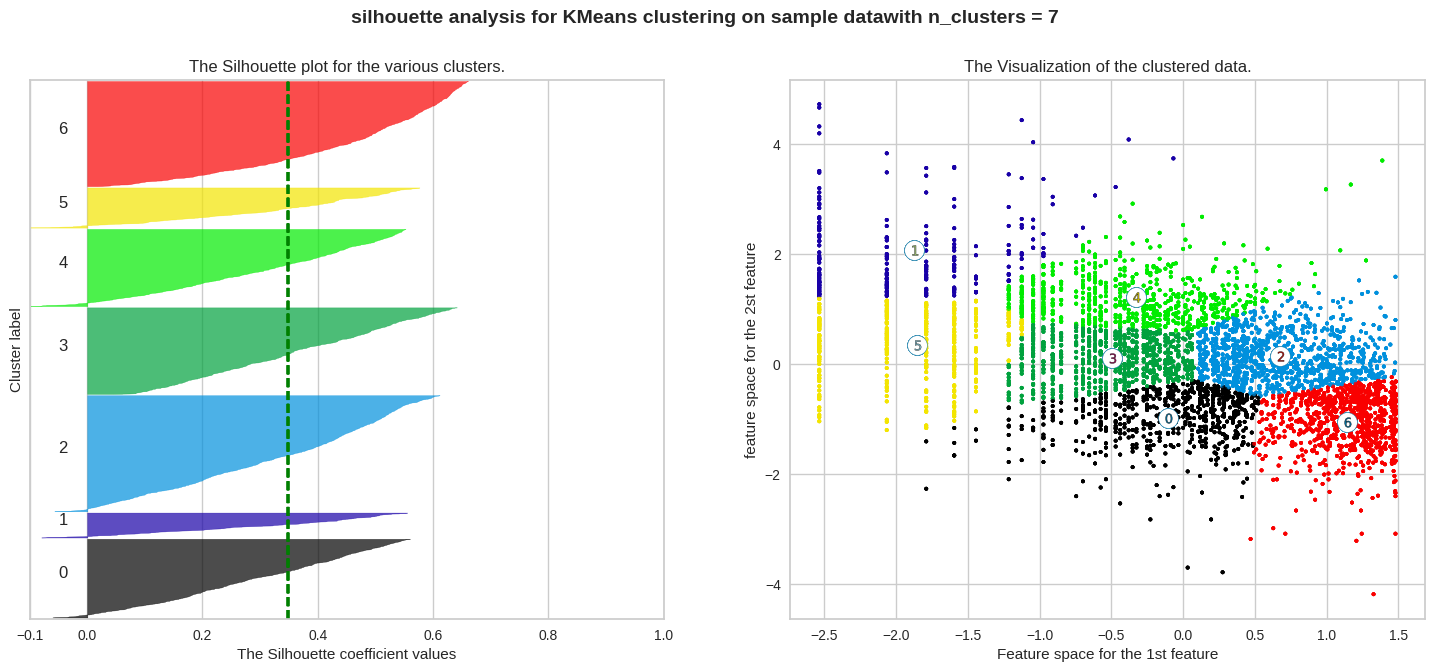

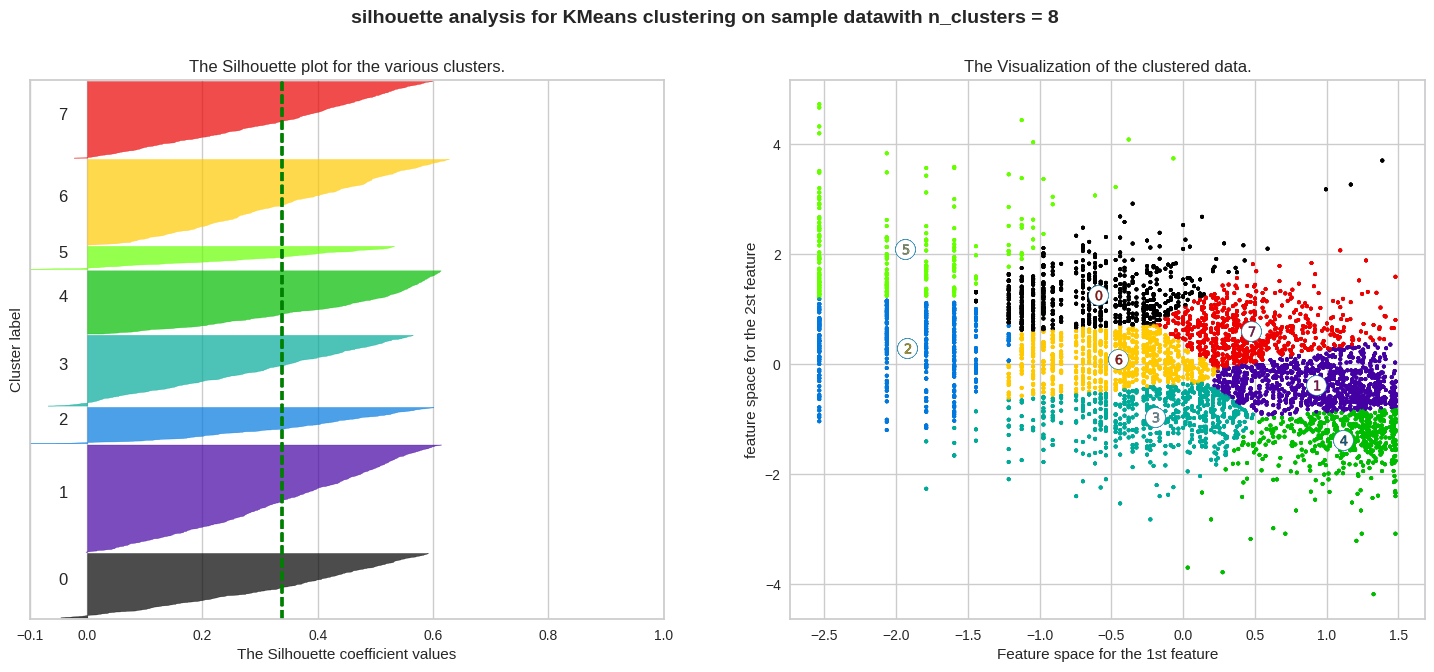

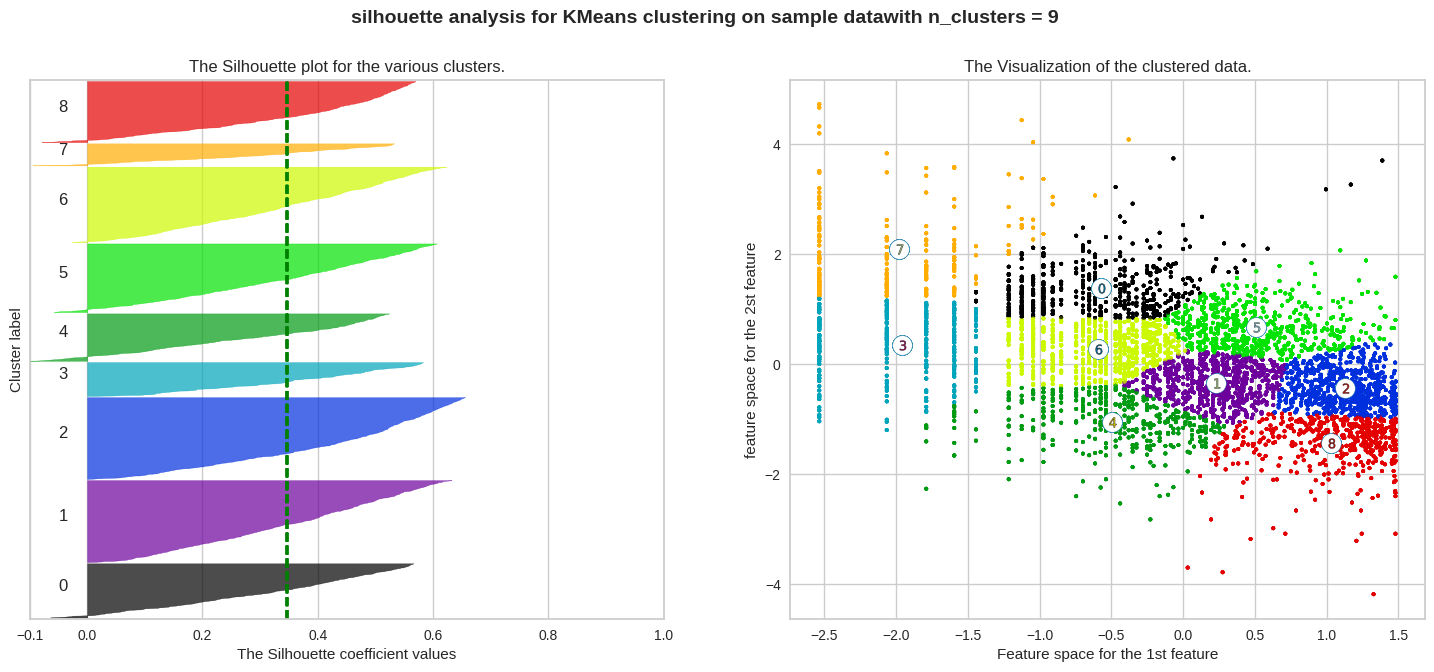

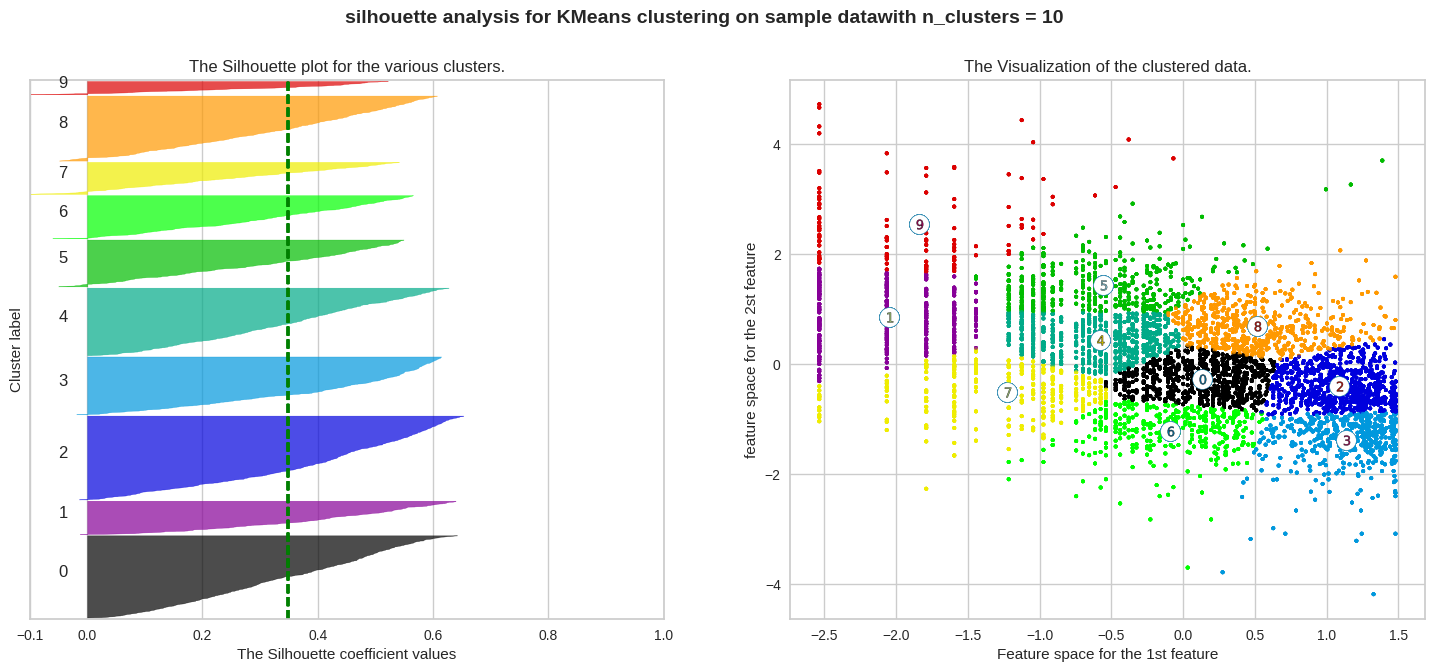

In [88]:
from yellowbrick import cluster

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
  #create a subplot with 1 row and 2 columns
  fig,(ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  # The 1st Subplot is the Silhouette plot
  # The Silhouette coefficient can range from -1,1 but in this example all
  # lie within [-0.1,1]
  ax1.set_xlim([-0.1,1])

  # The (n_clusters+1)*10 is for inserting blannk space between silhouette
  # Plots of individual clusters, to demarcate them clearly
  ax1.set_ylim([0,len(X) + (n_clusters + 1)*10])

  #Initialize the Clusterer with n_clusters value and a random generator
  #Seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters,random_state=1)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =",n_clusters,
        "The average silhouette _score is:",silhouette_avg)

  # Comput the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
  y_lower = 10

  for i in range(n_clusters):
    #Aggregate the silhouette score for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor = color, edgecolor = color, alpha=0.7)
    # Label the Silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5* size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The Silhouette plot for the various clusters.")
    ax1.set_xlabel("The Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The Vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="green", linestyle="--")

    ax1.set_yticks([]) #Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:,0],X[:,1], marker='.',s=30, lw=0, alpha=0.7,
                c=colors, edgecolor = 'k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circle at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='b')

    for i, c in enumerate(centers):
      ax2.scatter(c[0],c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

    ax2.set_title("The Visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("feature space for the 2st feature")
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data"
    "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()











### **Observations**

* **We got a good contour plot for Cluster-2, but there are still a few data points on the negative side of the silhouette coefficient, as shown in the figure below. But better than others**

###**So giving n_clusters=2 on KMeans Model**


In [89]:
# Applying KMeans_clustering algorithum
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans = kmeans_rec_mon.predict(X)

In [90]:
# Find the cluster for the observation giving in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  1  1       211          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  1  1       211          4   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  1  1       411          6   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  1  1       211          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  
CustomerID                         
12346.0                         1  
12347.0                         1  
12348.0                         1  
12349.0                         1  
12350.0                         0  
12352.0                         1  
12353.0                         0  
12354.0                         0  
12355.0                         0  
12356.0                         1

In [91]:
# Center of the Cluster(Coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[ 0.58135034, -0.56707106],
       [-0.85399273,  0.83301674]])

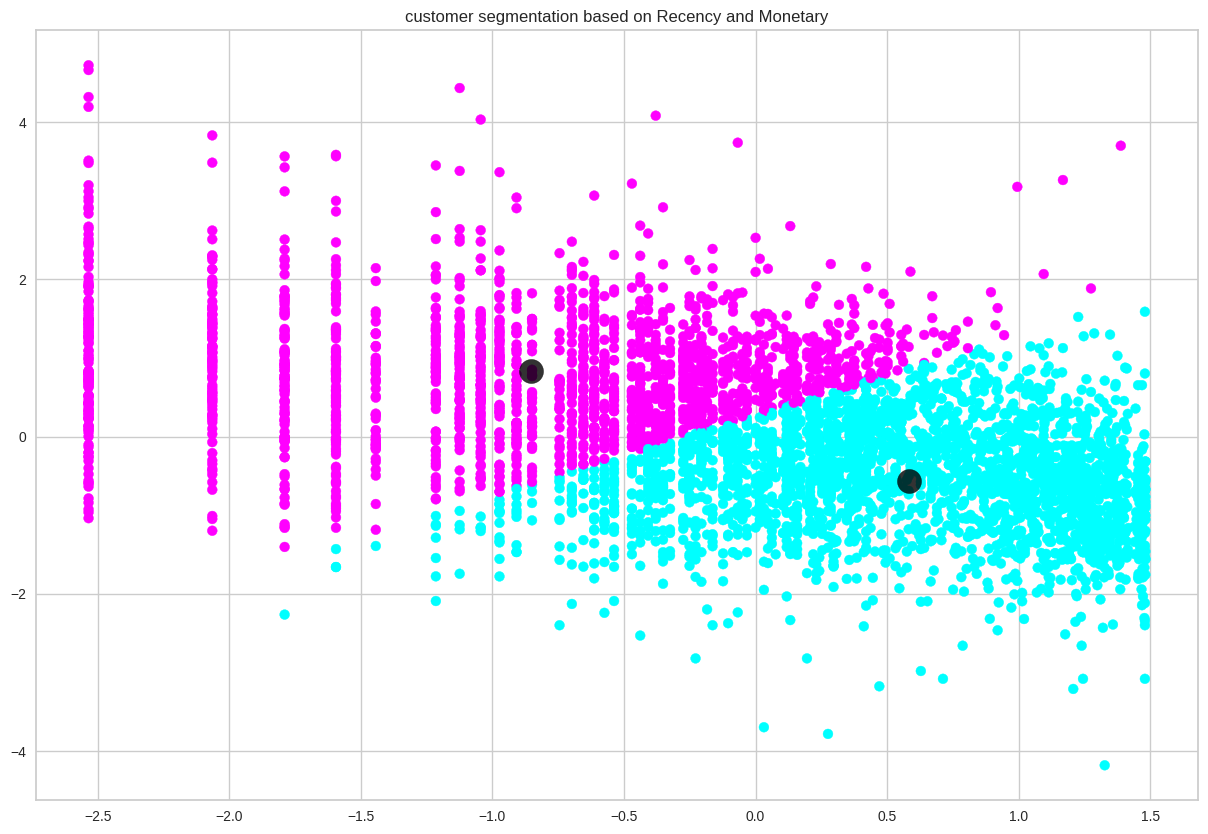

In [92]:
#Ploting Visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='cool')
centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='black', s=300, alpha=0.8)

##**(2) DBSCAN Algorithm on Recency and Monetray**

In [93]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [94]:
#eps value is the radius value for the datapoint from which circle is drwan and min samples indicates how many datapoints sholud be consider to consider to contain that point in cluster.
#Codesource (Sklearn Documentation)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels=db.labels_

#Number of cluster in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of cluster: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("silhouette Coefficient: %0.3f"% metrics.silhouette_score(X,labels))


Estimated number of cluster: 2
Estimated number of noise points: 76
silhouette Coefficient: 0.405


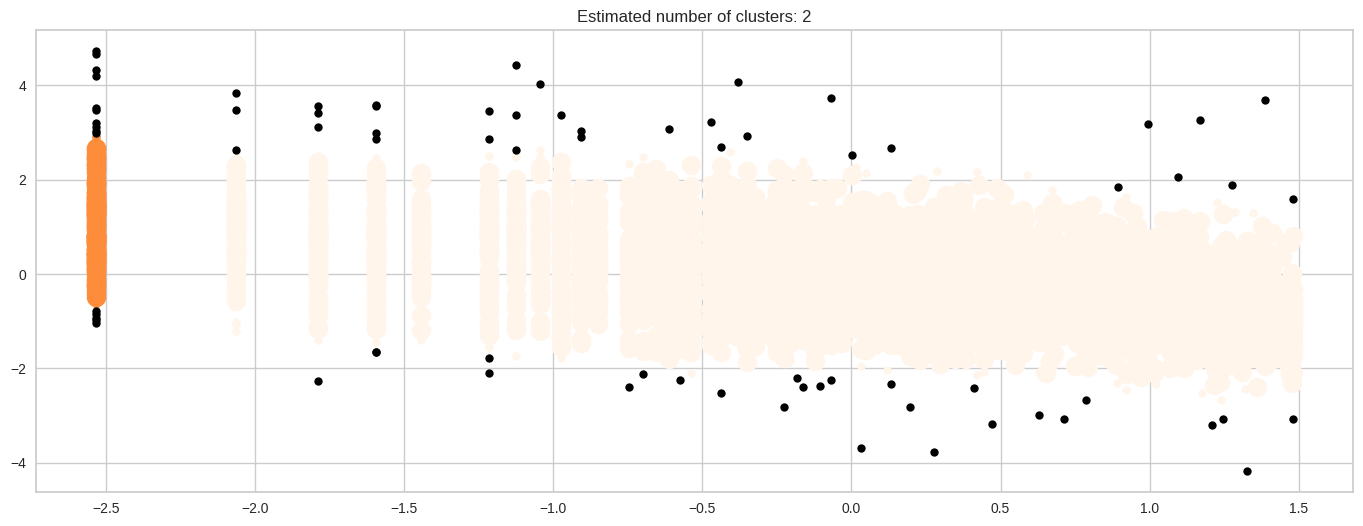

In [95]:
# Black Removed and is used for noise instead.
unique_labels =set(labels)
colors = [plt.cm.Oranges(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(17,6))
for k, col in zip(unique_labels, colors):
  if k ==-1:
    # Black used for noise.
    col = [0,0,0,1]

  class_member_mask = labels == k

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(

      xy [:, 0],
      xy [:, 1],
      "o",
      markerfacecolor = tuple(col),
      markeredgecolor ="k",
      markersize=14,
  )
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
      xy [:, 0],
      xy [:, 1],
      "o",
      markerfacecolor = tuple(col),
      markeredgecolor = "k",
      markersize=6,
  )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


##**Frequency and Monetary**-------------------------------

# **KMeans Clustering**

**Before using the Kmeans clustering algorithm, we need to determine the number of clusters we will input into the algorithm. Therefore, we will use Elbow's method to find the minimum number of required groups.**

##**(1) Applying Elbow Method on Frequency and Monetary**

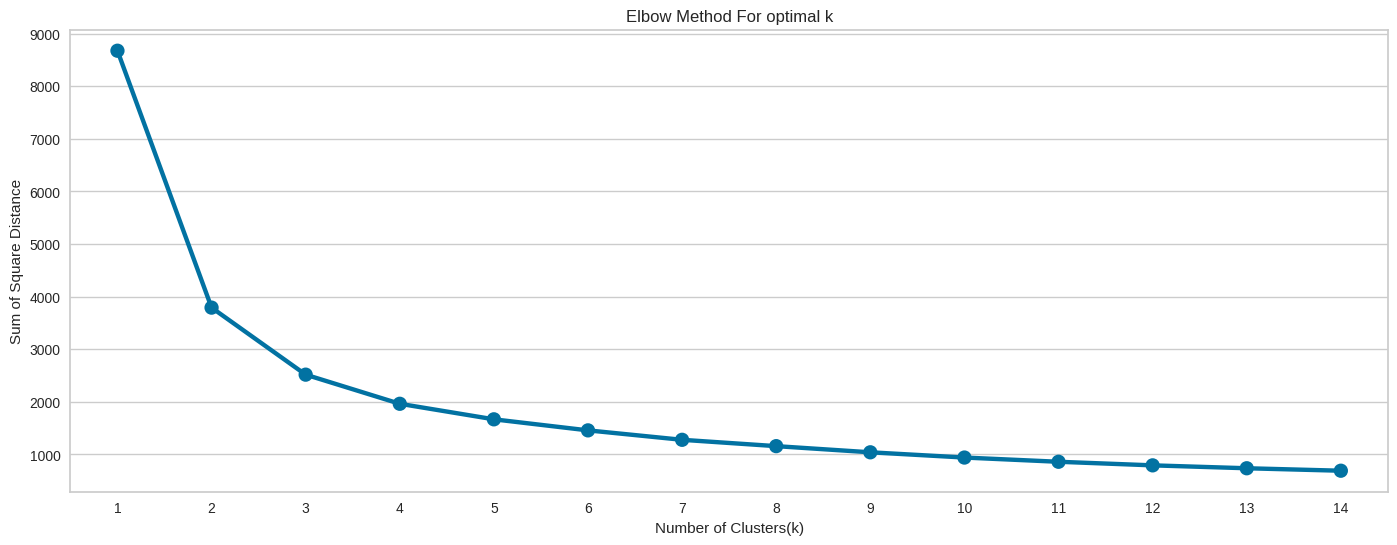

In [96]:
# Taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# Standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Applying Elbow Method
wcss={}
for k in range(1,15):
  km = KMeans(n_clusters=k, init='k-means++',max_iter=1000)
  km = km.fit(X)
  wcss[k] = km.inertia_

# Plot the graph for the sum of square distance values and number of Clusters
plt.figure(figsize=(17,6))
sns.pointplot(x= list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distance')
plt.title('Elbow Method For optimal k')
plt.show()

###**Here we can see that the optimal value for the group is 2.**

### **Cross Verify With Elbow Visualizer**

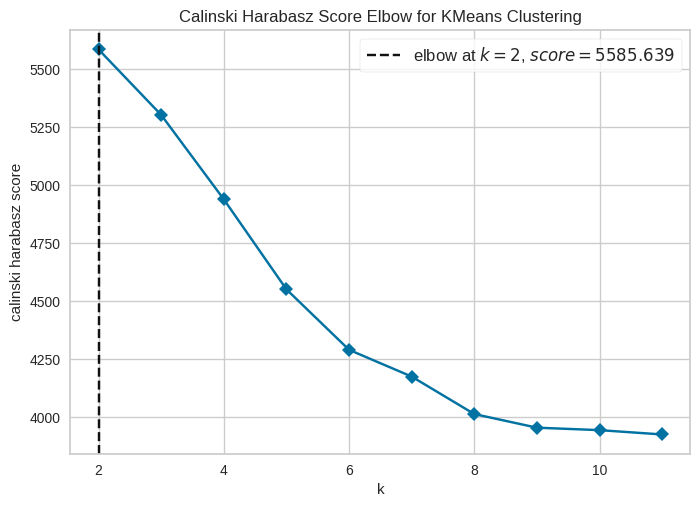

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [97]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#Instantiate the Clustering model and Visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)    #Fit the data to the visualizer
visualizer.show()   #FInalize and render the figure

**Elbow Visualizer also provides group=2**

###**Silhouette Score**
**Validating above optimal cluster value(i.e optimal_cluster = 2)**

In [98]:
# Taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

#Standard the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters,random_state=1)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score(X, preds)
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.3715810384601166
For n_clusters = 5, silhouette score is 0.3442965607959301
For n_clusters = 6, silhouette score is 0.3586829219947334
For n_clusters = 7, silhouette score is 0.34342098057749704
For n_clusters = 8, silhouette score is 0.3500546906243836
For n_clusters = 9, silhouette score is 0.34419928062567495
For n_clusters = 10, silhouette score is 0.36238664926507114
For n_clusters = 11, silhouette score is 0.3682455762844025
For n_clusters = 12, silhouette score is 0.3534862139672636
For n_clusters = 13, silhouette score is 0.36139542577471895
For n_clusters = 14, silhouette score is 0.3486849890768239
For n_clusters = 15, silhouette score is 0.3628225939841498


**Here we can see that the score profile for n_cluster = 2 is good compared to others. (A value close to 1 indicates that the data point is within the cluster and the data point is far away from the rest of the cluster.)**

For n_clusters= 2 The average silhouette_score is : 0.478535709506603
For n_clusters= 3 The average silhouette_score is : 0.40764120562174455
For n_clusters= 4 The average silhouette_score is : 0.3715810384601166
For n_clusters= 5 The average silhouette_score is : 0.3442965607959301
For n_clusters= 6 The average silhouette_score is : 0.3586829219947334
For n_clusters= 7 The average silhouette_score is : 0.34342098057749704
For n_clusters= 8 The average silhouette_score is : 0.3500546906243836
For n_clusters= 9 The average silhouette_score is : 0.34419928062567495
For n_clusters= 10 The average silhouette_score is : 0.36238664926507114


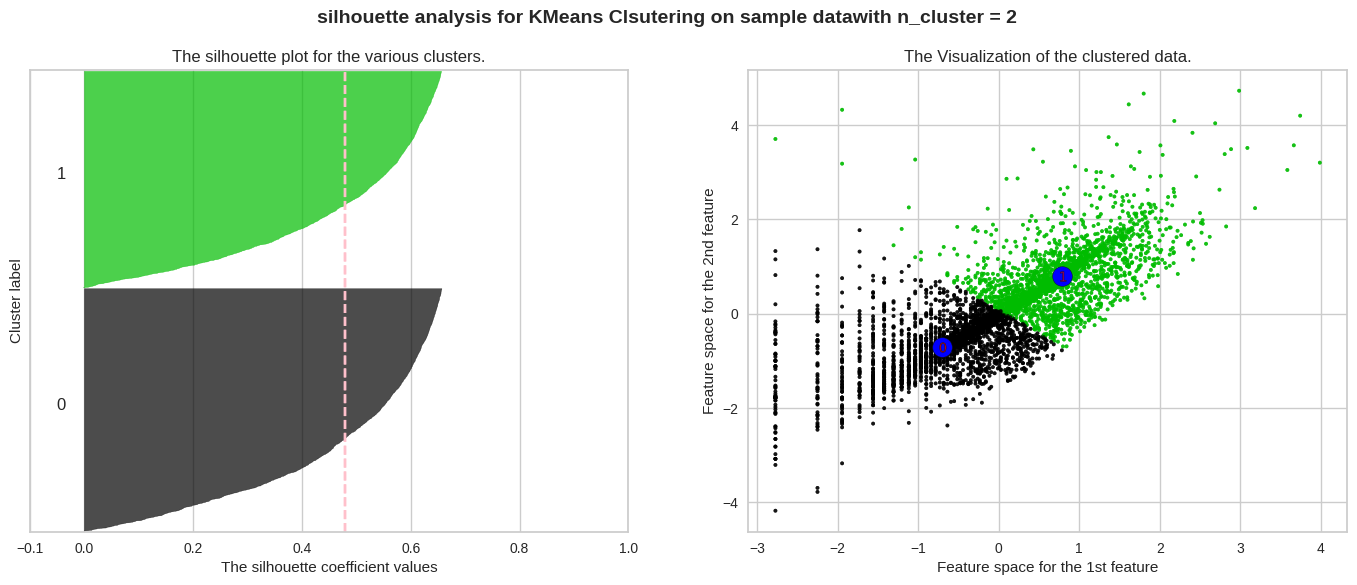

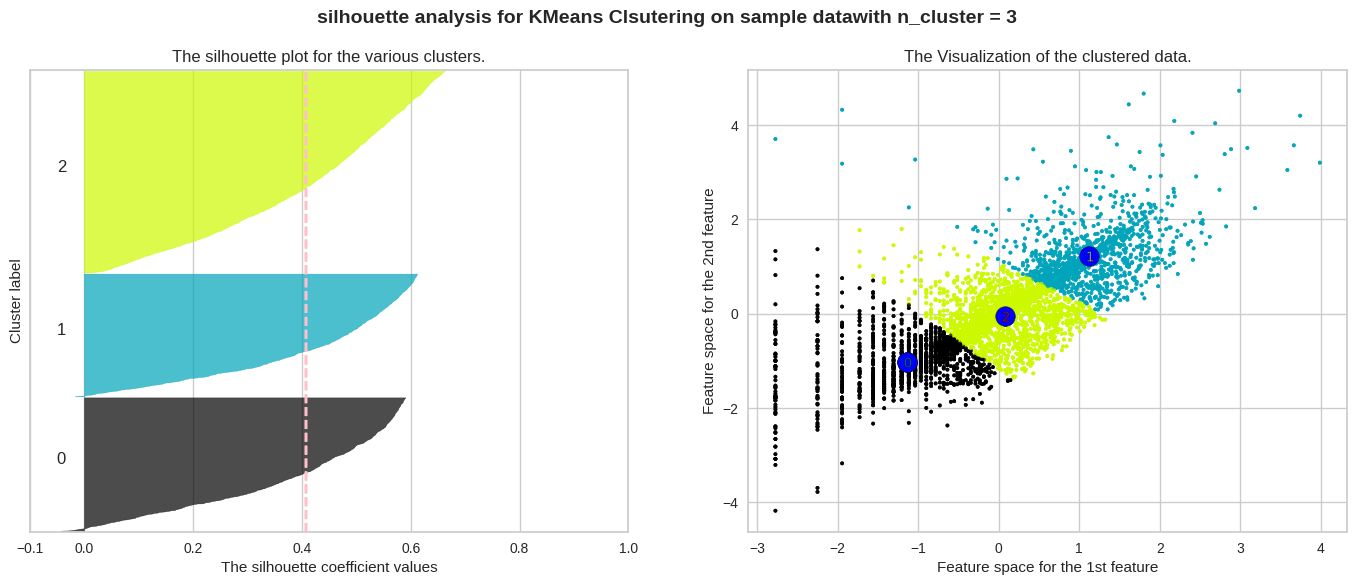

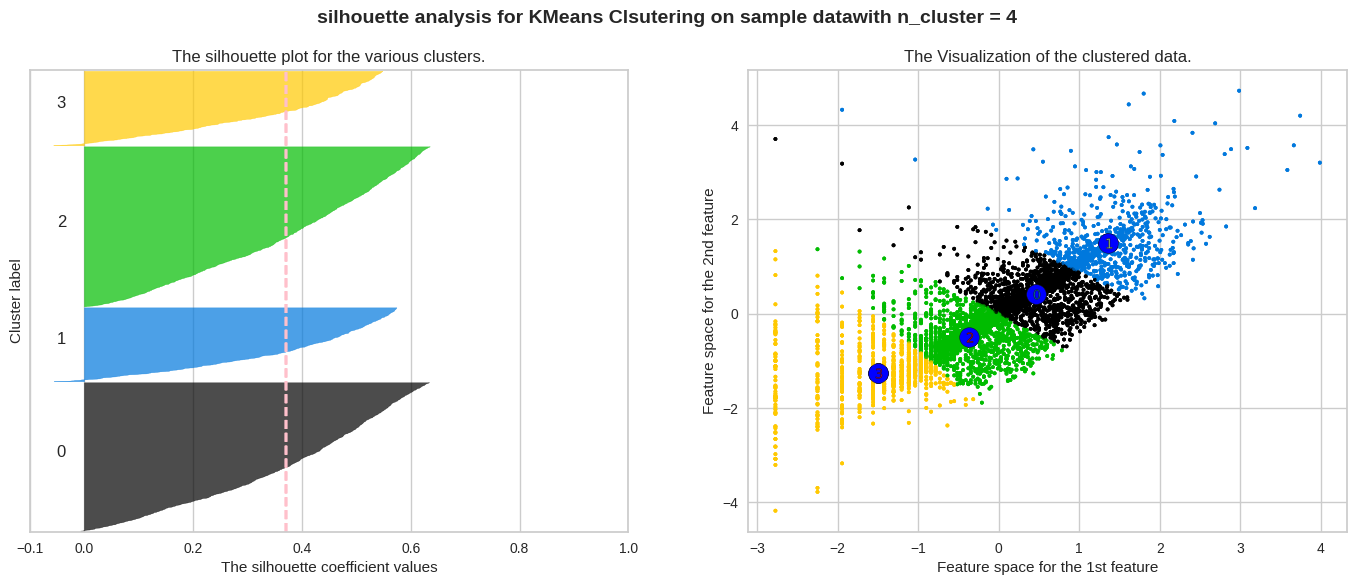

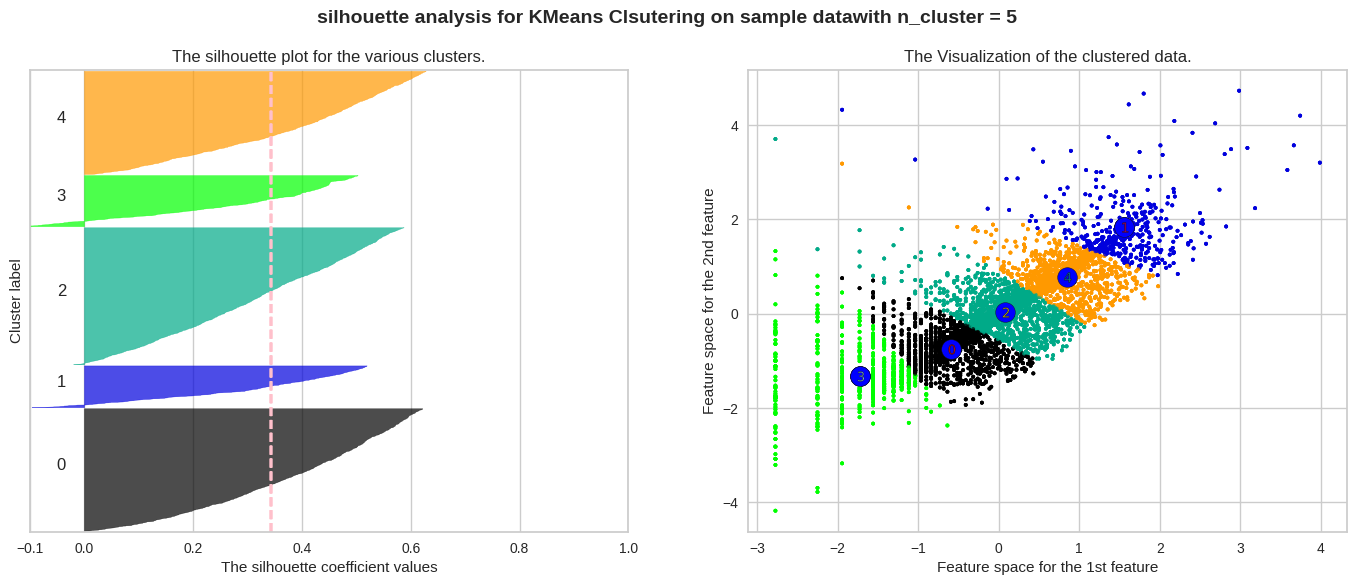

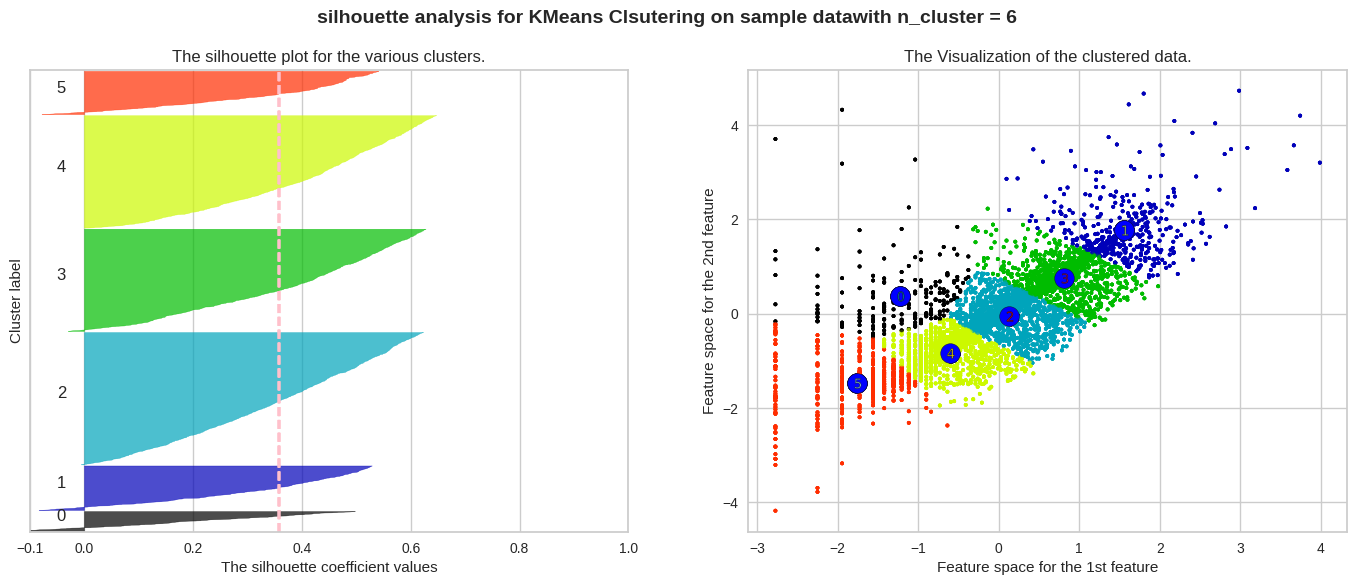

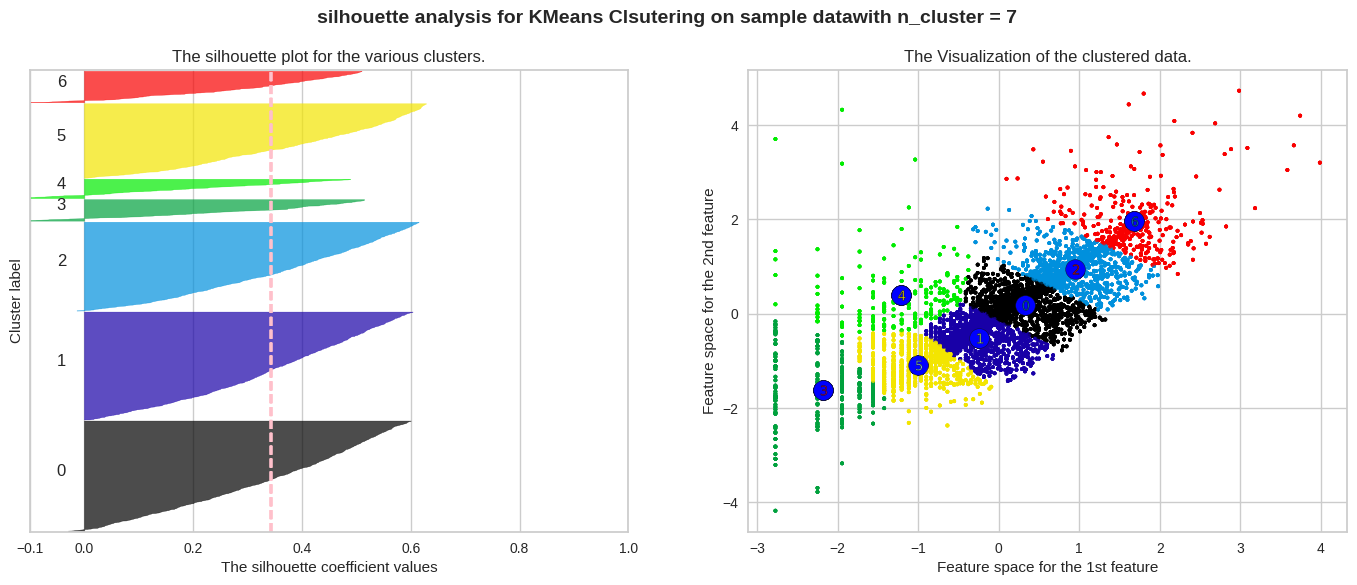

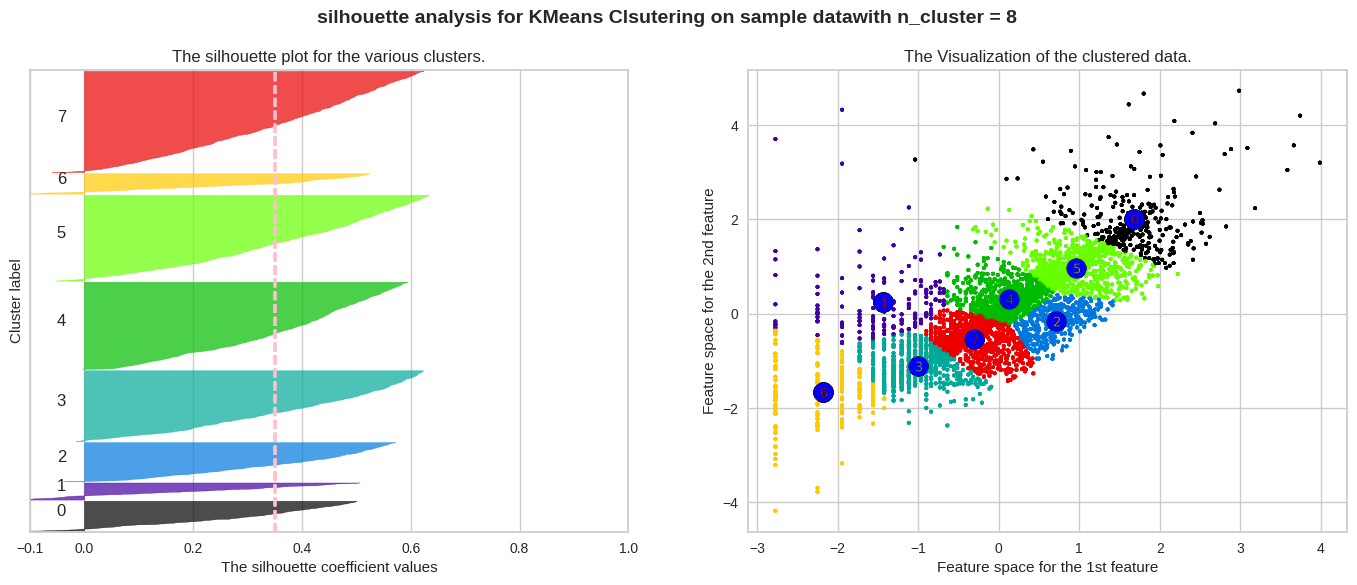

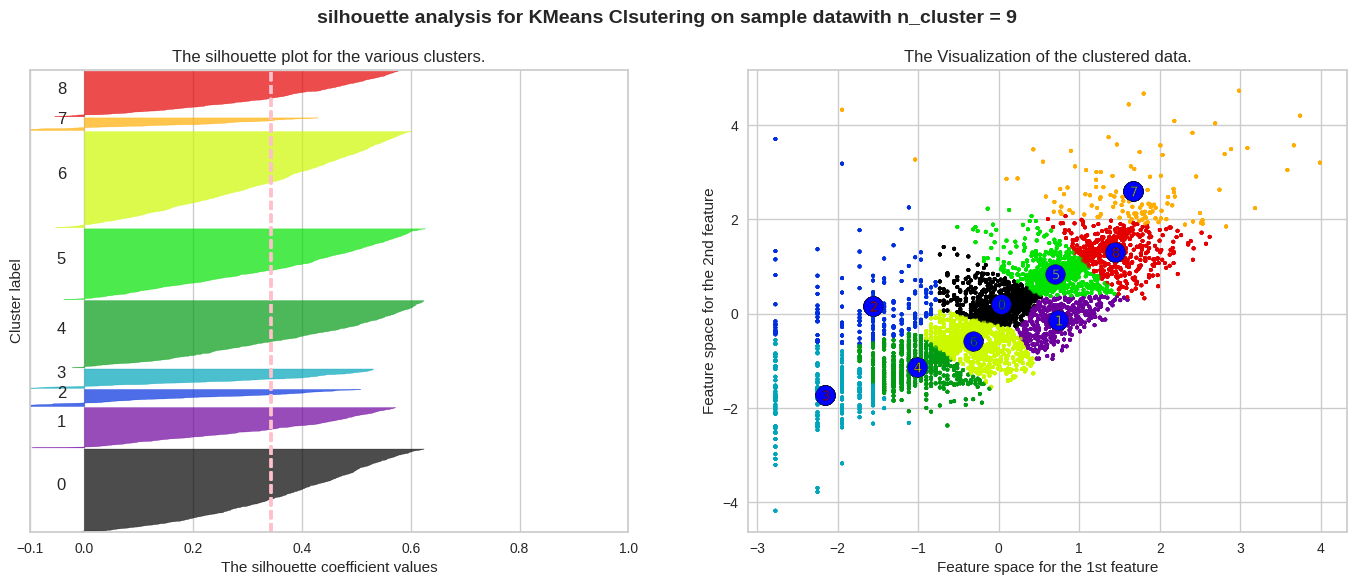

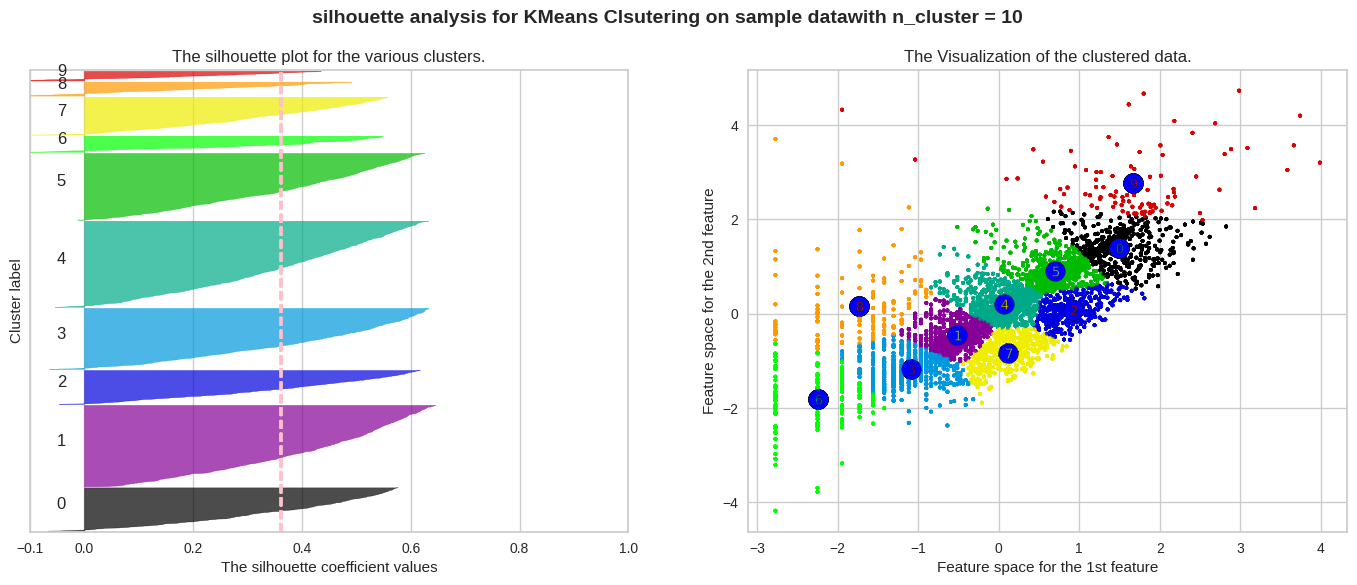

In [99]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
  #create s subplot with 1 row and 2 columns
  fig,(ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(17,6)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1,1 but in tis example all
  # lie within[-0.1,1]
  ax1.set_xlim([-0.1,1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # Plots of individual cluster, to demarcate them clearly.
  ax1.set_ylim([0, len(X) + (n_clusters + 1)*10])

  # Initialize the cluster with n_clusters value and a random genrator
  # seed of 10 for reproduciblity.
  clusterer = KMeans(n_clusters=n_clusters, random_state=1)
  cluster_labels = clusterer.fit_predict(X)

  # The SIlhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and sepration of the formed
  # Clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters=",n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette score for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette score for sample belongibg to
    # cluster i, and sort them
    ith_cluster_silhouette_values=\
    sample_silhouette_values[cluster_labels==i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color,edgecolor=color,alpha=0.7)

    # Label the silhouette plots with their cluster number at the middle
    ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="pink", linestyle="--")

    ax1.set_yticks([])   # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

    # 2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw whote circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:,1],marker='o',
                c="blue", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1],marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

      ax2.set_title("The Visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")
      plt.suptitle(("silhouette analysis for KMeans Clsutering on sample data"
      "with n_cluster = %d" % n_clusters),
                    fontsize=14, fontweight='bold')



plt.show()




* **Silhouette plot Frequency and Monetary with cluster =2 is very good as compare to Recency and Monetary's silhouette plot.**
* **No details on negative silhouette coefficient value.**

###**So giving n_cluster = 2 on KMeans Model.**

In [100]:
# Applying KMeans _clustering algorithum
kmeans_freq_mon = KMeans(n_clusters = 2)
kmeans_freq_mon.fit(X)
y_kmeans = kmeans_rec_mon.predict(X)

In [101]:
# Find the clusters for the observation giving in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  1  1       211          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  1  1       211          4   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  1  1       411          6   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  1  1       211          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  
CustomerID                         
12346.0                         0  
12347.0                         0  
12348.0                         0  
12349.0                         0  
12350.0                         1  
12352.0                         0  
12353.0                         1  
12354.0                         0  
12355.0                         1  
12356.0                         0

In [102]:
# Centers of the clusters(Coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.79016407,  0.79810393],
       [-0.70535589, -0.71244356]])

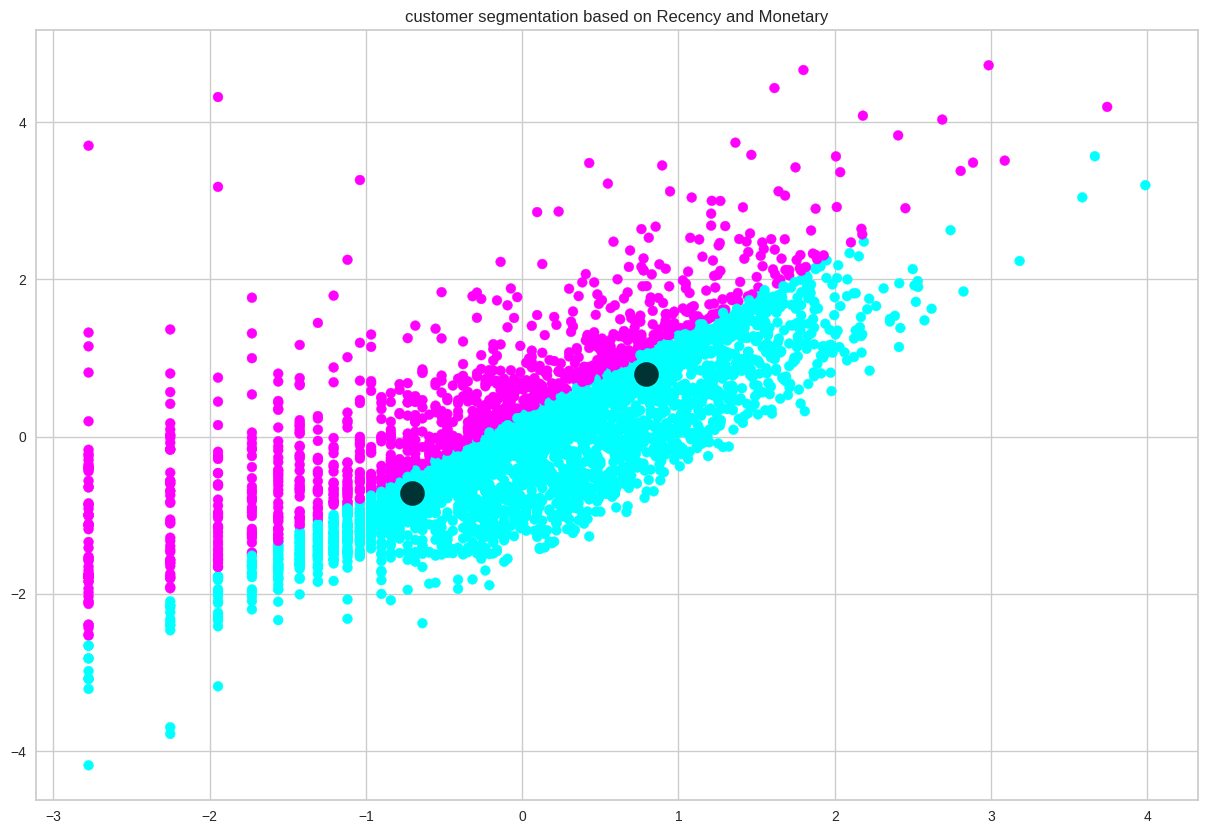

In [103]:
# Ploting Visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='cool')
centers= kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, alpha=0.8)

## **2) DBSCAN Algorithm on Frequency and Monetary**

In [104]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 47
Silhouette Coefficient: 0.426


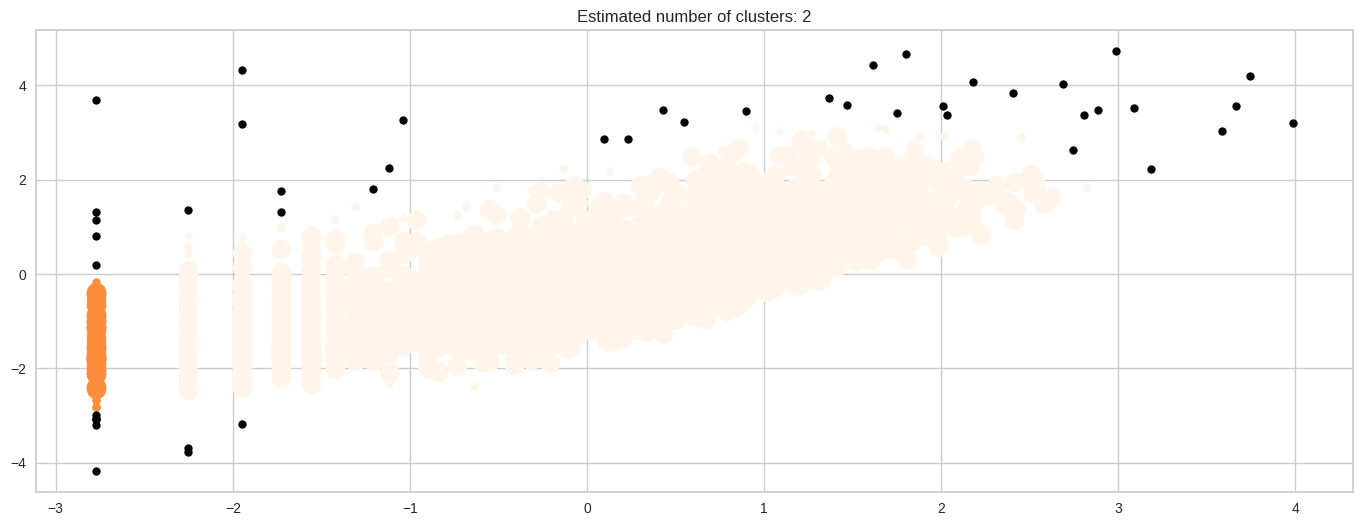

In [105]:
# Black Removed and is used for noise instead.
unique_labels =set(labels)
colors = [plt.cm.Oranges(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(17,6))
for k, col in zip(unique_labels, colors):
  if k ==-1:
    # Black used for noise.
    col = [0,0,0,1]

  class_member_mask = labels == k

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(

      xy [:, 0],
      xy [:, 1],
      "o",
      markerfacecolor = tuple(col),
      markeredgecolor ="k",
      markersize=14,
  )

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
      xy [:, 0],
      xy [:, 1],
      "o",
      markerfacecolor = tuple(col),
      markeredgecolor = "k",
      markersize=6,
  )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


##**Recency,Frequency and Monetary**-------------------

#**KMeans Clustering**

**Before using the Kmeans clustering algorithm, we need to determine the number of clusters we will input into the algorithm. Therefore, we will use Elbow's method to find the minimum number of required groups.**

##**(1)Applying Elbow Method on Recency, Frequency and Monetary.**

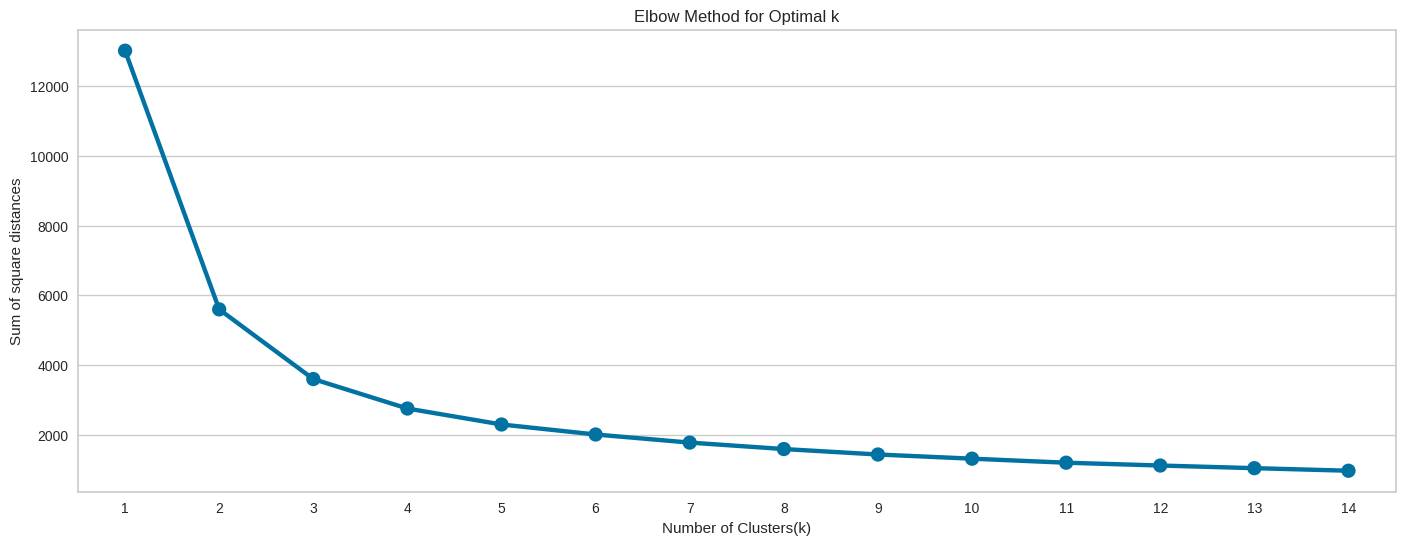

In [106]:
# Taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Frequency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values


#Standard the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Applying Elbow Method
wcss ={}
for k in range(1,15):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km = km.fit(X)
  wcss[k] = km.inertia_

# Plot The graoh for the sum of square distance values and Number of Clusters
plt.figure(figsize=(17,6))
sns.pointplot(x = list(wcss.keys()), y= list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of square distances')
plt.title('Elbow Method for Optimal k')
plt.show()


###**Here we can see that the optimal value for the group is 2.**

### **Cross Verifying with Elbow Visualizer**




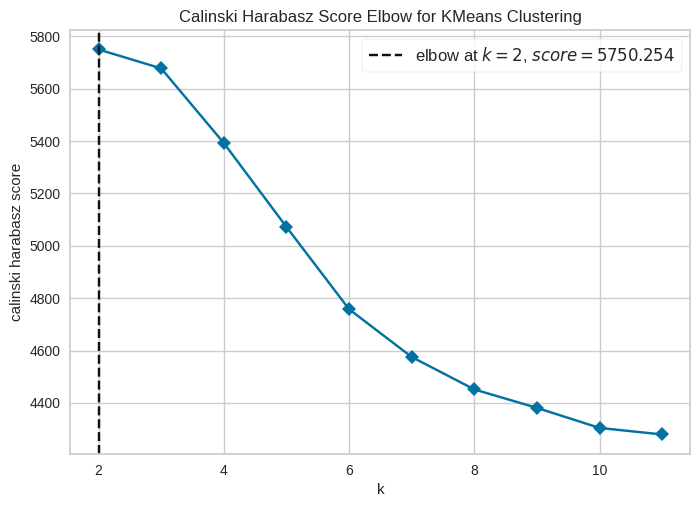

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [107]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#Instantiate the Clustering model and Visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)    #Fit the data to the visualizer
visualizer.show()   #FInalize and render the figure

**Elbow Visualizer also provides group=2**

###**Silhouette Score**
**Validating above optimal cluster value(i.e optimal_cluster = 2)**

In [108]:
# Taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.3715810384601166
For n_clusters = 5, silhouette score is 0.3442965607959301
For n_clusters = 6, silhouette score is 0.3586829219947334
For n_clusters = 7, silhouette score is 0.34342098057749704
For n_clusters = 8, silhouette score is 0.3500546906243836
For n_clusters = 9, silhouette score is 0.34419928062567495
For n_clusters = 10, silhouette score is 0.36238664926507114
For n_clusters = 11, silhouette score is 0.3682455762844025
For n_clusters = 12, silhouette score is 0.3534862139672636
For n_clusters = 13, silhouette score is 0.36139542577471895
For n_clusters = 14, silhouette score is 0.3486849890768239
For n_clusters = 15, silhouette score is 0.3628225939841498


**Here we can see that the score profile for n_cluster = 2 is good compared to others. (A value close to 1 indicates that the data point is within the cluster and the data point is far away from the rest of the cluster.)**

For n_clusters = 2 The average silhouette_score is : 0.478535709506603
For n_clusters = 3 The average silhouette_score is : 0.40764120562174455
For n_clusters = 4 The average silhouette_score is : 0.3715810384601166
For n_clusters = 5 The average silhouette_score is : 0.3442965607959301
For n_clusters = 6 The average silhouette_score is : 0.3586829219947334
For n_clusters = 7 The average silhouette_score is : 0.34342098057749704
For n_clusters = 8 The average silhouette_score is : 0.3500546906243836
For n_clusters = 9 The average silhouette_score is : 0.34419928062567495
For n_clusters = 10 The average silhouette_score is : 0.36238664926507114


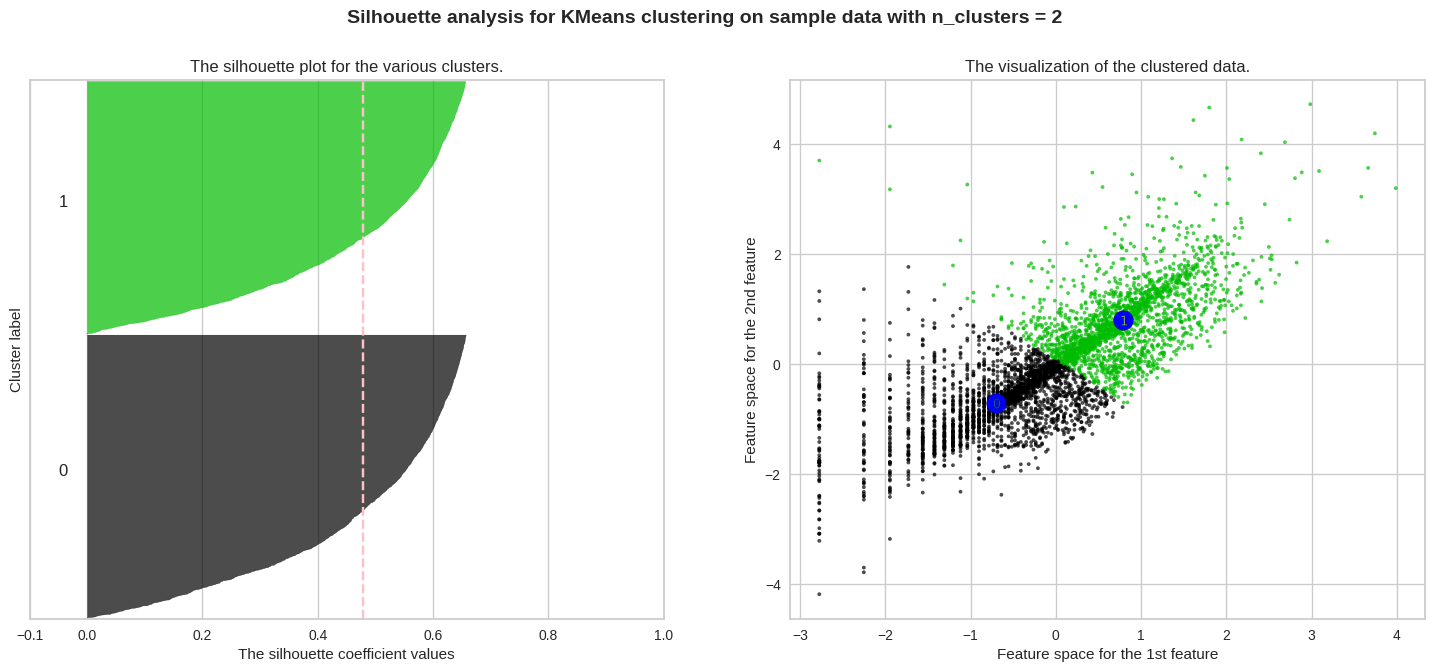

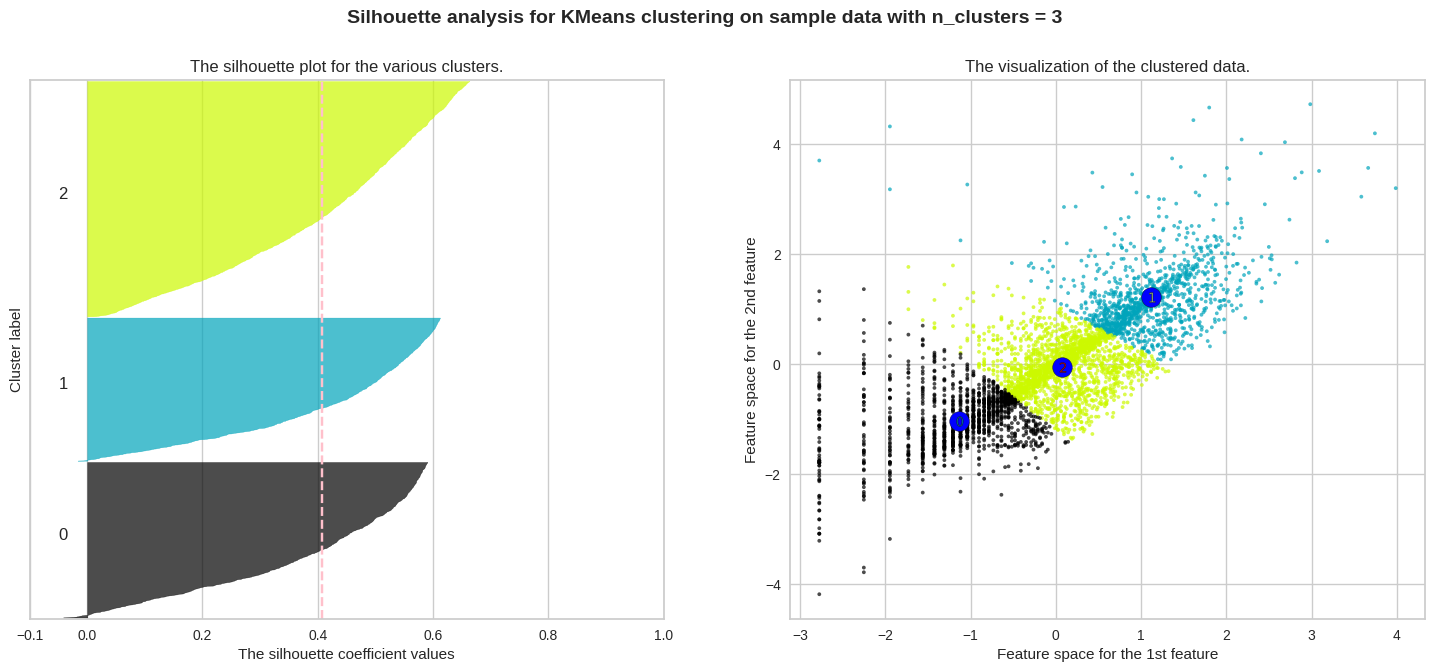

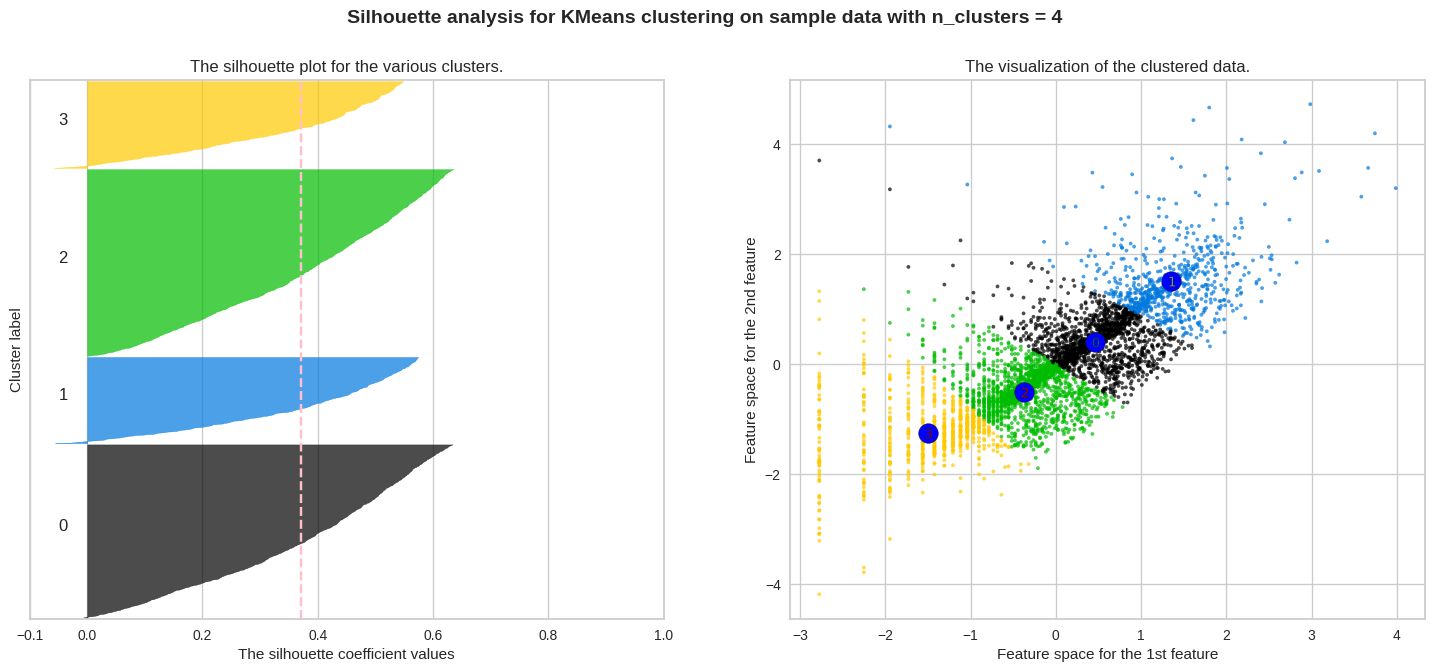

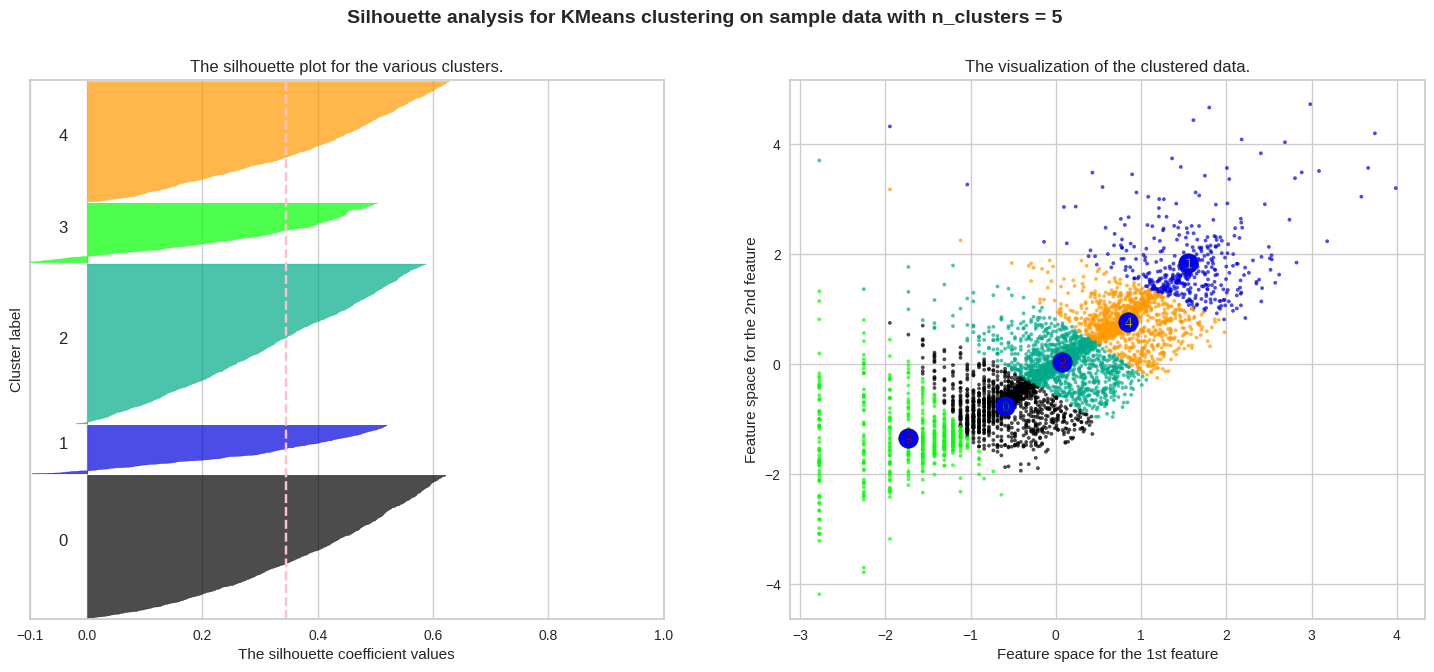

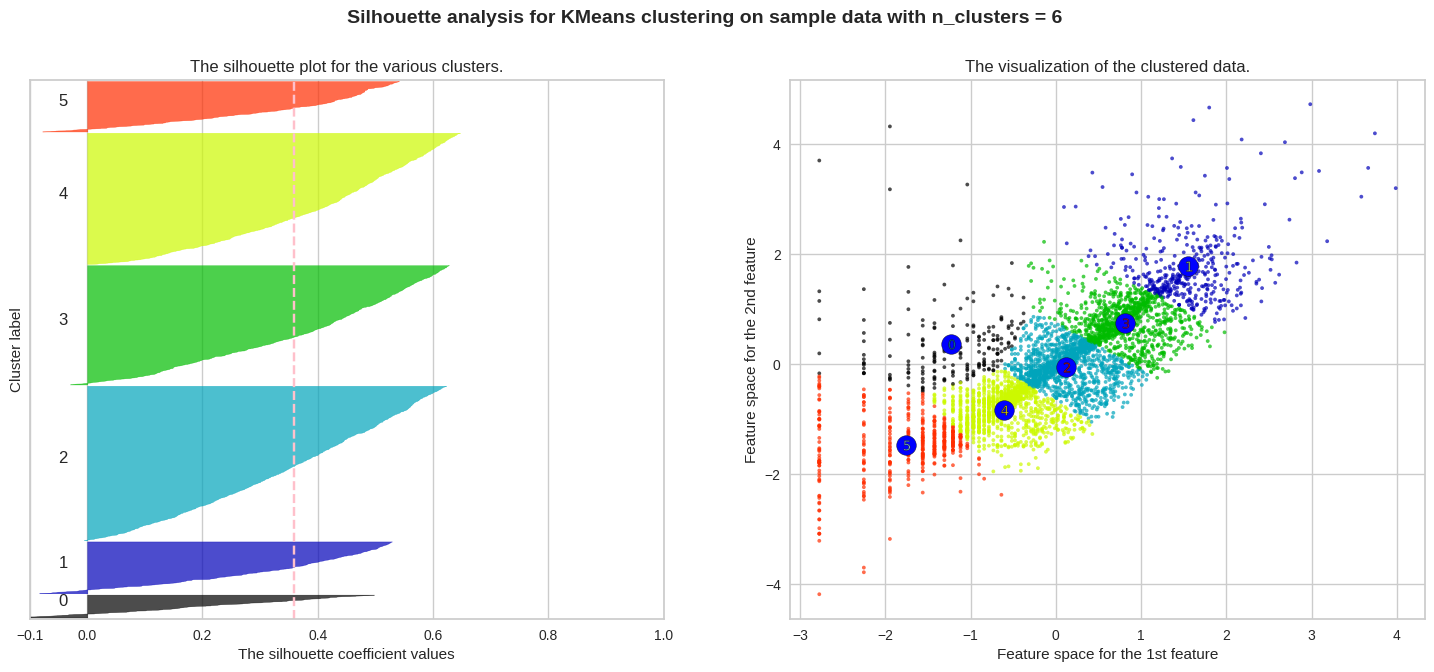

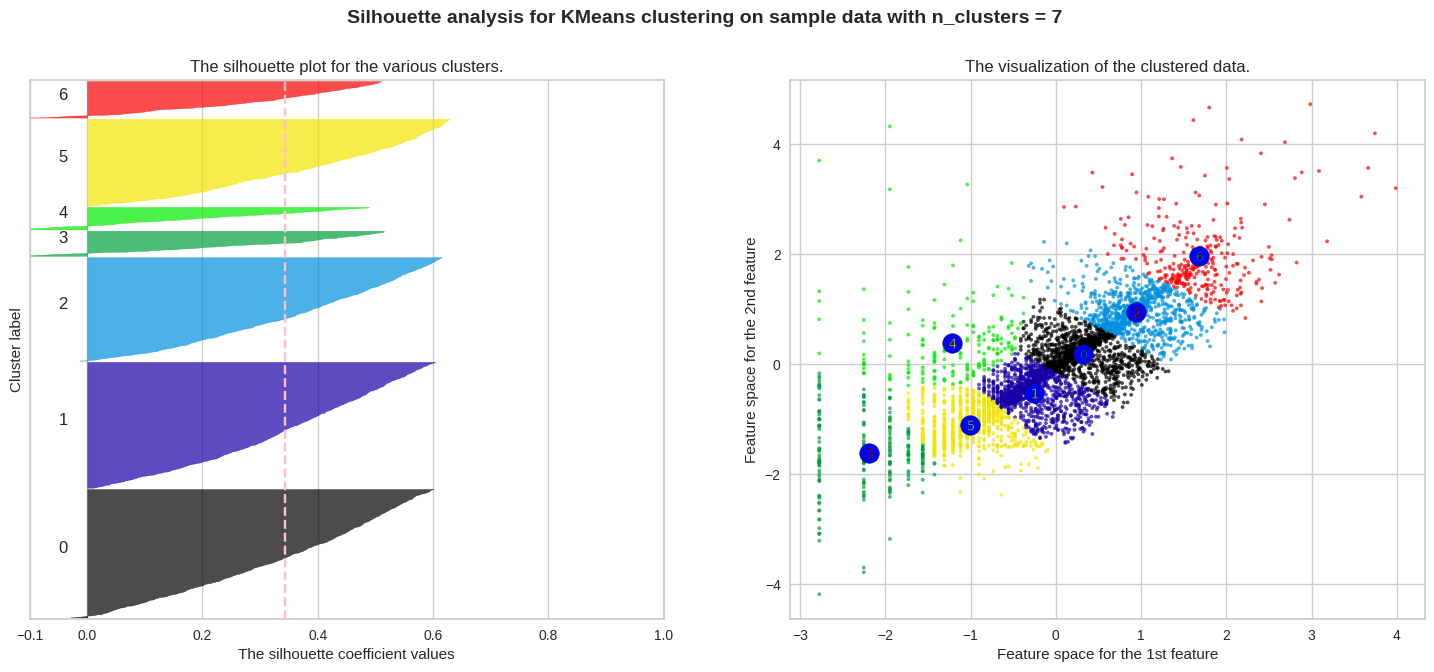

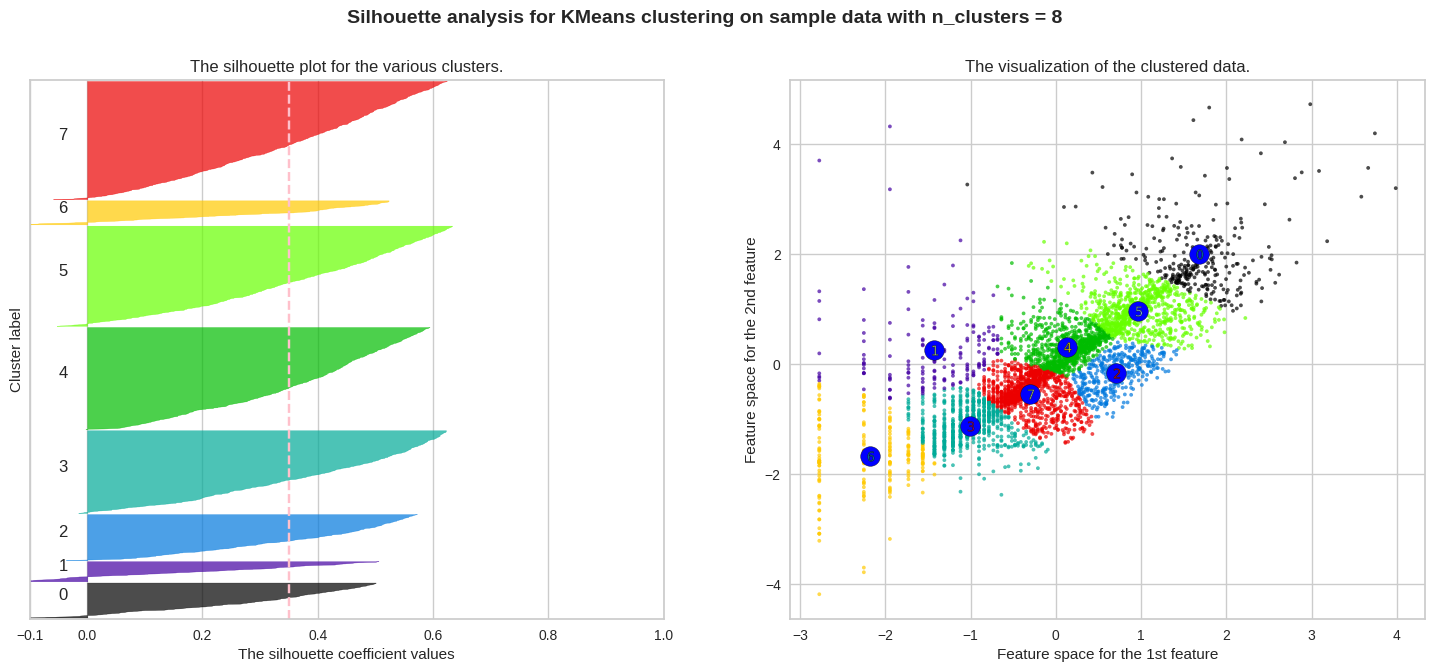

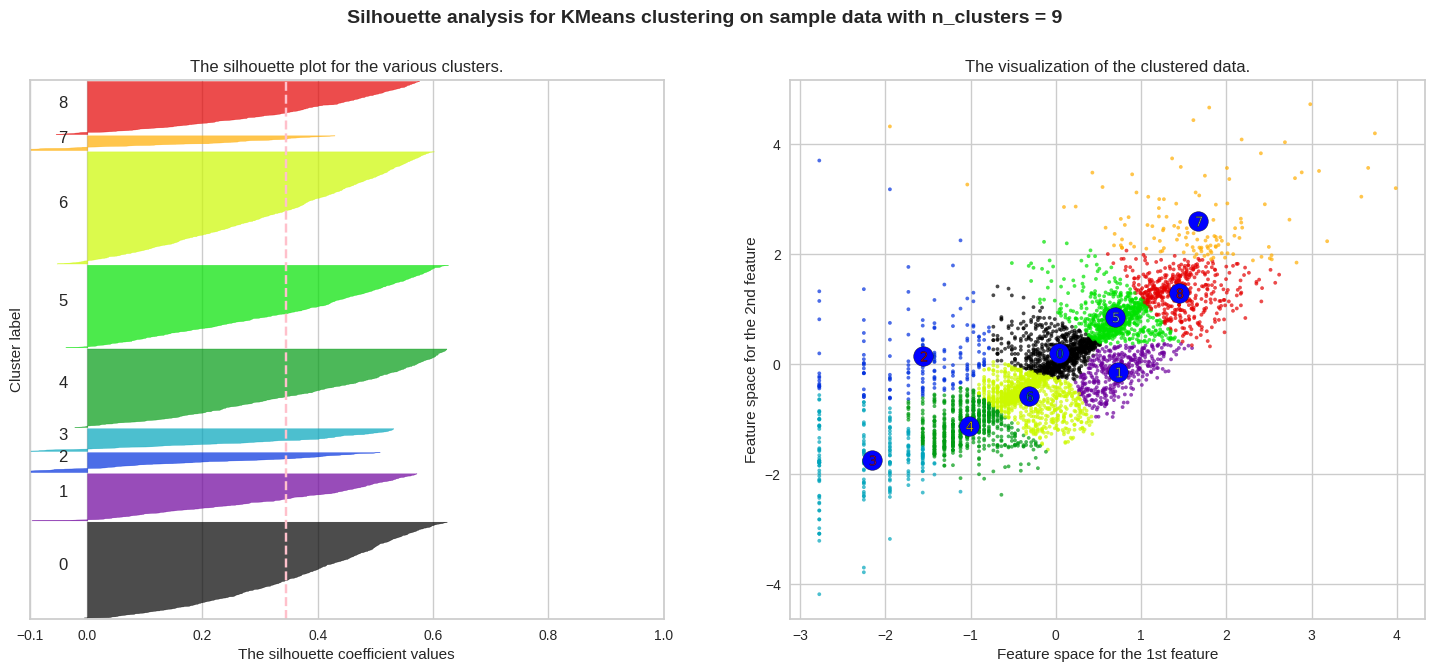

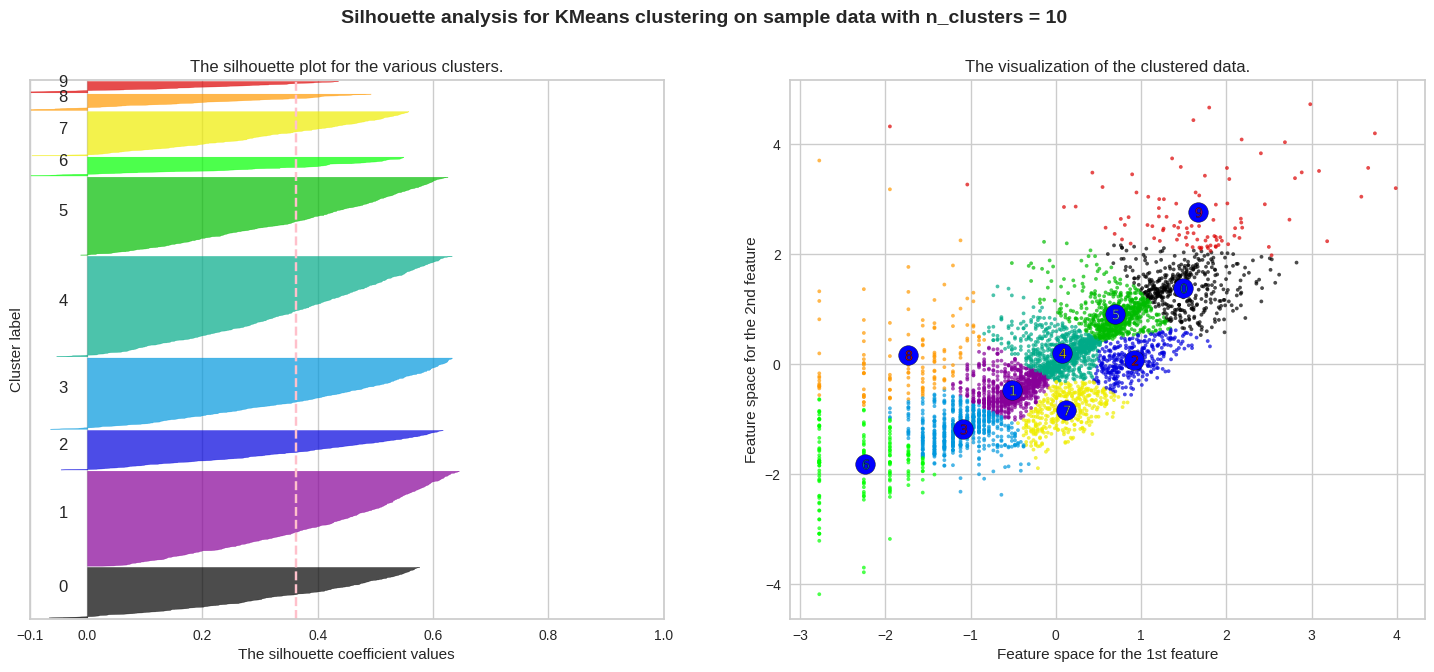

In [109]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="pink", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="blue", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

* **Silhouette plot Frequency and Monetary with cluster =2 is very good as compare to Recency and Monetary's silhouette plot.**
* **No details on negative silhouette coefficient value**

### **So giving n_clusters=2 on KMeans Model.**

In [110]:
# Applying KMeans _clustering algorithum
kmeans_freq_mon_rec = KMeans(n_clusters = 2)
kmeans_freq_mon_rec.fit(X)
y_kmeans = kmeans_freq_mon_rec.predict(X)

In [111]:
# Find the clusters for the observation giving in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  1  1       211          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  1  1       211          4   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  1  1       411          6   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  1  1       211          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon_rec  
CustomerID                                                        
12346.0                         0                              0  
12347.0                         0                              0  
12348.0                         0                              0  
12349.0                         0                              0  
12350.0                         1                              1  
12352.0                         0                              0  
12353.0                         1                              1  
12354.0                         0                              0  
12355.0                         1                              1  
12356.0                         0                              0

In [112]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[ 0.79051776,  0.79921778],
       [-0.70436717, -0.71211907]])

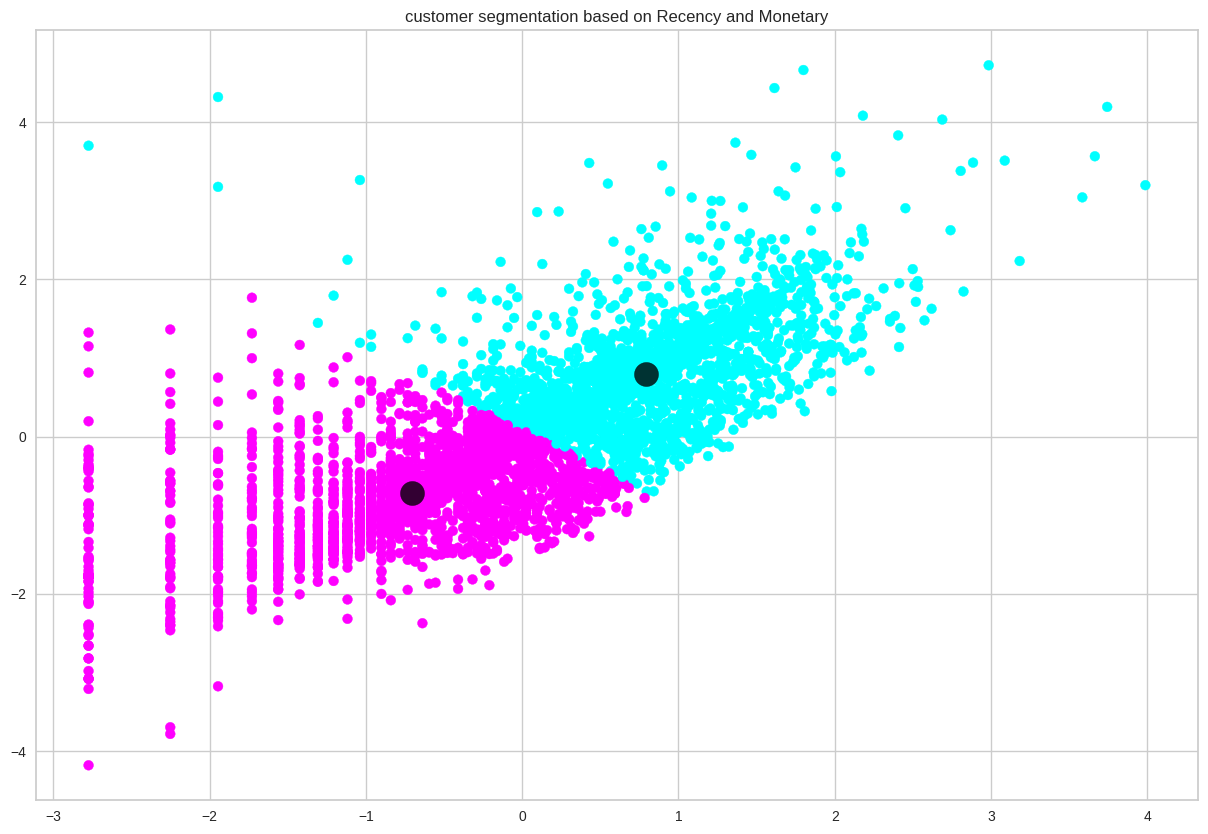

In [113]:
# Ploting Visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='cool')
centers= kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, alpha=0.8)

## **(2) DBSCAN Algorithum on Recency and Monetary**

In [114]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))



Estimated number of clusters: 2
Estimated number of noise points: 36
Silhouette Coefficient: 0.429


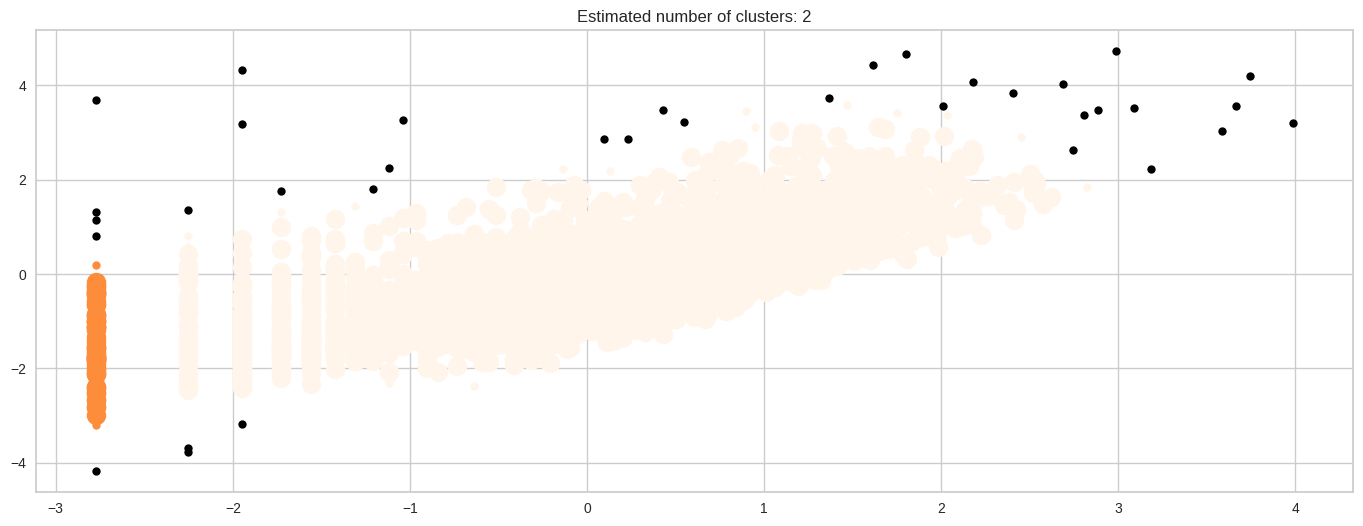

In [115]:
# Black Removed and is used for noise instead.
unique_labels =set(labels)
colors = [plt.cm.Oranges(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(17,6))
for k, col in zip(unique_labels, colors):
  if k ==-1:
    # Black used for noise.
    col = [0,0,0,1]

  class_member_mask = labels == k

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(

      xy [:, 0],
      xy [:, 1],
      "o",
      markerfacecolor = tuple(col),
      markeredgecolor ="k",
      markersize=14,
  )

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
      xy [:, 0],
      xy [:, 1],
      "o",
      markerfacecolor = tuple(col),
      markeredgecolor = "k",
      markersize=6,
  )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#**Hierarchical Clustering**

## **How ​​to choose the number of Cluster in hierarchical Cluster?**

**A dendrogram is a dendrogram that records sequences of clustering or division. The greater the distance between the vertical lines in the dendrogram, the greater the distance between these groups.**

**We can adjust the distance and draw a horizontal line (usually we try to set the starting point so that it intersects the maximum vertical line. Find the maximum vertical distance that we can voluntarily complete without crossing the other horizontal lines.**

In [116]:
import scipy.cluster.hierarchy as sch

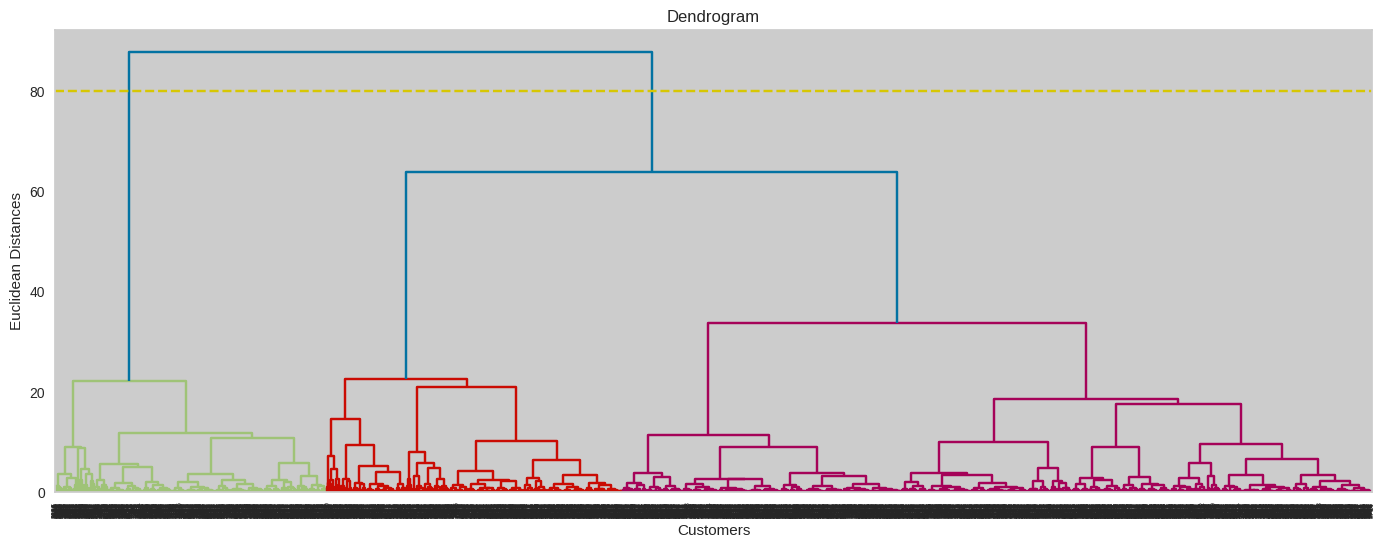

In [117]:
plt.figure(figsize=(17,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='y', linestyle='--')
plt.show()# find largest Vertical distances we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No.of Cluster = 2**

In [118]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = h_clustering.fit_predict(X)

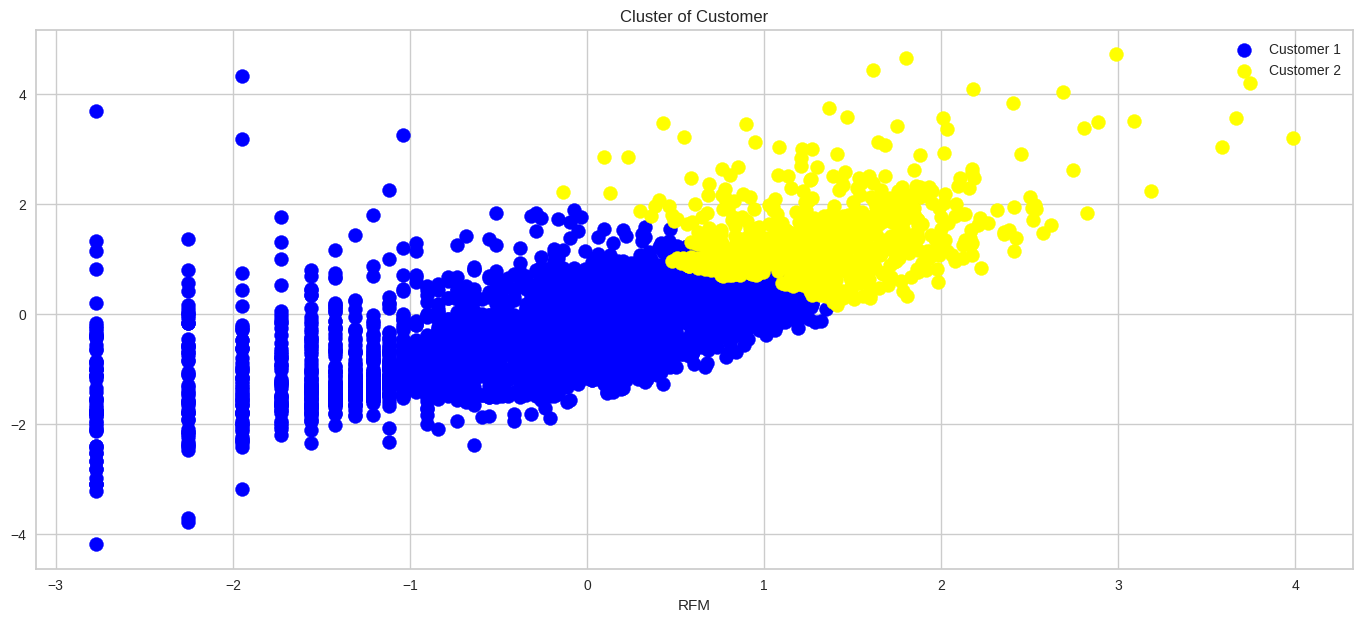

In [119]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(17,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1],  s = 100, c= 'blue', label = 'Customer 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, c = 'yellow', label = 'Customer 2')
# plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, c = 'pink', label = 'Target')

plt.title('Cluster of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [120]:
rfm_dataframe.head(1)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1   77183.6  4  4  1       441          9   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825            0.0     11.253942   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon_rec  
CustomerID                                                        
12346.0                         0                              0

In [121]:
data_process_normalized = rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]


In [122]:

data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency':['mean','min','max'],
    'Frequency':['mean','min','max'],
    'Monetary':['mean','min','max','count']
})

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                               47.206660   1  372  170.119980   1  7847   
1                              131.965592   1  373   21.994338   1   112   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                              3928.656416  302.10  280206.02  2042  
1                               387.234975    3.75    6748.80  2296

##**Summary and Conclusion of Project**


**We grouped by RFM analysis first. We create 4 customer groups/segments based on RFM scores.**


**We then applied the machine learning algorithm to the customer group.**


* **Because the above clustering will show 3 more together, it is made for data on the basis of timeliness, frequency and value (Kmeans clustering).**

* **Cluster 0 has higher but less frequency and value Cluster 0 has 2414 customers.**

* **Cluster 1 has a lower return, but they tend to buy and spend more than other customers because the average income is very high. thus generating additional income for the retail business**


**This time our project has been completed. We can also use more cluster analysis, not just using RFM but also using other metrics such as demographics or products.**